<p style="text-align:center">
    <a href="https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64" target="_blank">
    <img src="app/header.png" width="1000" alt="AI-generated image of an x-rayed car having a CO2 mark on its left side driving in a highway">
    </a>
</p>


<h1>Predicting CO2 Emissions of Internal Combustion Engine Vehicles (ICEVs)</h1>  


**Author: Hasan Roshan**
    

**Objectives**

This analysis is done to predict use-phase CO2 emissions of newly produced Internal Combustion Engine Vehicles (ICEVs). The process includes:

* Importing data into Python and preparing it for analysis
* Performing an explanatory data analysis to understand various relationships between diverse features
* Using scikit-learn to train models and identify the best
* Exporting the best model for app deployment.


<h1>Table of Contents</h1>

<div class="alert alert-block" style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 15px; 
    border-radius: 5px; 
    margin-top: 20px">
    <ol>
        <li>Introduction</li>
        <li>Data Understanding</li>
        <li>Data Wrangling</li>
        <li>Explanatory Data Analysis (EDA)</li>
        <li>Machine Learning Modeling</li>
        <li>Conclusions</li>
    </ol>
</div>
<br>
<hr>

<div style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 15px; 
    border-radius: 5px; 
    font-size: 24px;
    font-weight: bold;
    margin-top: 20px;">
    <h2 id="introduction" style="margin: 0;">1. Introduction</h2>
</div>


Internal Combustion Engine Vehicles (ICEVs) are a significant source of greenhouse gas (GHG) emissions, contributing substantially to climate change. Accurately predicting CO₂ emissions from ICEVs is crucial for policymakers, consumers, and researchers aiming to mitigate environmental impact.

This project focuses on use-phase CO₂ emissions of ICEVs, utilizing publicly available data from the NAtural Resources of Canada. The dataset spans records from 1995 to 2025, offering a comprehensive basis for emissions modeling.

The workflow follows these key steps:
- Data Preparation: Import, clean, and preprocess multiple datasets while ensuring data consistency by handling missing values, filtering hybrid vehicles, and addressing outliers.
- Exploratory Data Analysis (EDA): Identify key relationships between variables such as engine size, fuel type, and fuel efficiency (MPG), and detect multicollinearity among predictors.
- Machine Learning Model Development:
    - Train multiple linear regression and polynomial ridge regression models to establish baseline predictions.
    - Implement a random forest model, leveraging its ability to handle nonlinear relationships and complex interactions.
    - Compare model performance using cross-validation and key metrics (R², RMSE, MAE).
- Model Deployment: Export the best-performing model and integrate it into an interactive web application using Streamlit, allowing users to predict CO₂ emissions for different vehicle specifications.

By the end of this project, we will have developed a robust predictive framework for estimating ICEV emissions, highlighting the strengths of ML-based approaches in environmental impact assessments.

<div style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 15px; 
    border-radius: 5px; 
    font-size: 24px;
    font-weight: bold;
    margin-top: 20px;">
    <h2 id="data_understanding" style="margin: 0; padding: 5px 10px;">2. Data Understanding</h2>
</div>

<h3>Importing Needing Libraries</h3> 

In [1]:
import pandas as pd
import numpy as np
import glob
import pylab as pl
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("done!")

done!


Now that I have the required libraries, my first step is to import and take a look at the data.


There are 9 data files related to different timeframes. They contain model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada from 1995 to 2025. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

I first import and then combine them to have one file. Upon reviewing the source data and a manual inspection, I found out the files are compatible and ready to merge. 

In [5]:
# List of file paths
file_paths = [
    "CO2/data/my1995-2004-fuel-consumption-ratings-5-cycle.csv",
    "CO2/data/my2005-2014-fuel-consumption-ratings-5-cycle.csv",
    "CO2/data/my2015-2019-fuel-consumption-ratings.csv",
    "CO2/data/my2020-fuel-consumption-ratings.csv",
    "CO2/data/my2021-fuel-consumption-ratings.csv",
    "CO2/data/my2022-fuel-consumption-ratings.csv",
    "CO2/data/my2023-fuel-consumption-ratings.csv",
    "CO2/data/my2024-fuel-consumption-ratings.csv",
    "CO2/data/my2025-fuel-consumption-ratings.csv"
]

# Read and concatenate files with encoding handling
dfs = []
for file in file_paths:
    try:
        df = pd.read_csv(file, encoding="utf-8")  # Try UTF-8 first
    except UnicodeDecodeError:
        df = pd.read_csv(file, encoding="ISO-8859-1")  # Fallback encoding
    dfs.append(df)

# Combine all DataFrames
df = pd.concat(dfs, ignore_index=True)

# Save the combined dataset if needed
df.to_csv("combined_fuel_consumption.csv", index=False)


In [6]:
# Preview the first few rows
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,1995,Acura,Integra,Subcompact,1.8,4,A4,X,11.6,8.3,10.1,28,232,NaN,NaN
1,1995,Acura,Integra,Subcompact,1.8,4,M5,X,11.0,8.3,9.8,29,225,NaN,NaN
2,1995,Acura,Integra GS-R,Subcompact,1.8,4,M5,Z,10.8,8.3,9.7,29,223,NaN,NaN
3,1995,Acura,Legend,Compact,3.2,6,A4,Z,14.2,10.5,12.5,23,288,NaN,NaN
4,1995,Acura,Legend Coupe,Compact,3.2,6,A4,Z,14.6,11.0,13.0,22,299,NaN,NaN


For more information on each variable, please check [this link](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/ec44c747-a640-4481-bcf0-a2ea7ca8f249) from the data source.

Let's check data types and make sure they are correctly assigned.

In [13]:
df.dtypes

Model year                int64
Make                     object
Model                    object
Vehicle class            object
Engine size (L)         float64
Cylinders                 int64
Transmission             object
Fuel type                object
City (L/100 km)         float64
Highway (L/100 km)      float64
Combined (L/100 km)     float64
Combined (mpg)            int64
CO2 emissions (g/km)      int64
CO2 rating              float64
Smog rating             float64
dtype: object

All data types are correct. Now, let's investigate missing values.

Let's take a look at the summary of the data.

In [16]:
df.describe(include="all")  # Summary of numerical and categorical data

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,28384.000000,28384,28384,28384,28384.000000,28384.000000,28384,28384,28384.000000,28384.000000,28384.000000,28384.000000,28384.000000,9403.000000,8297.000000
unique,NaN,55,4393,17,NaN,NaN,30,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Chevrolet,Mustang,Compact,NaN,NaN,A4,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2657,139,3886,NaN,NaN,5489,15468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2010.705609,NaN,NaN,NaN,3.332867,5.819828,NaN,NaN,13.765075,9.977822,12.060960,25.068842,274.582335,4.628948,4.839340
std,8.341663,NaN,NaN,NaN,1.340189,1.808745,NaN,NaN,3.746177,2.580177,3.182836,6.825489,66.020731,1.568625,1.755582
min,1995.000000,NaN,NaN,NaN,0.800000,2.000000,NaN,NaN,4.000000,3.900000,4.000000,10.000000,94.000000,1.000000,1.000000
25%,2004.000000,NaN,NaN,NaN,2.200000,4.000000,NaN,NaN,11.200000,8.200000,9.900000,20.000000,228.000000,4.000000,3.000000
50%,2011.000000,NaN,NaN,NaN,3.000000,6.000000,NaN,NaN,13.350000,9.500000,11.600000,24.000000,267.000000,5.000000,5.000000
75%,2018.000000,NaN,NaN,NaN,4.200000,8.000000,NaN,NaN,15.800000,11.300000,13.800000,29.000000,313.000000,5.000000,6.000000


<div style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 15px; 
    border-radius: 5px; 
    font-size: 24px;
    font-weight: bold;
    margin-top: 20px;">
    <h2 id="data_wrangling" style="margin: 0; padding: 5px 10px;">3. Data Wrangling</h2>
</div>

Now, it's time to focus on data preparation.

<h3>Handling Missing Data</h3> 

In [20]:
df.isnull().sum()

Model year                  0
Make                        0
Model                       0
Vehicle class               0
Engine size (L)             0
Cylinders                   0
Transmission                0
Fuel type                   0
City (L/100 km)             0
Highway (L/100 km)          0
Combined (L/100 km)         0
Combined (mpg)              0
CO2 emissions (g/km)        0
CO2 rating              18981
Smog rating             20087
dtype: int64

There are significant missing values for the last two columns- `CO2 rating` and `smog rating`. The source indicates these values are not available for the years 1995-2004.

There is a decision to make here on how to deal with these missing values. I decided to drop the columns entirely for the following reasons:
- They are not necessary for this analysis.
- It's more important to have the ~2000 data points.
- I don't have enough data to make a plausible strategy to fill the missing data.

In [23]:
# Drop the last two columns
# df = df.iloc[:, :-2]
# Drop unnecessary columns
cdf = df.drop(columns=["CO2 rating", "Smog rating"])

In [25]:
cdf.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km)
0,1995,Acura,Integra,Subcompact,1.8,4,A4,X,11.6,8.3,10.1,28,232
1,1995,Acura,Integra,Subcompact,1.8,4,M5,X,11.0,8.3,9.8,29,225
2,1995,Acura,Integra GS-R,Subcompact,1.8,4,M5,Z,10.8,8.3,9.7,29,223
3,1995,Acura,Legend,Compact,3.2,6,A4,Z,14.2,10.5,12.5,23,288
4,1995,Acura,Legend Coupe,Compact,3.2,6,A4,Z,14.6,11.0,13.0,22,299


<h3>Feature Engineering</h3> 

Let's first drop `Combined (L/100 km)` since it perfectly correlates with `combined (mpg)`. Notice the `Combine (mpg)` is in Imperial gallon.

In [29]:
# Drop 'Combined (L/100 km)' column
cdf = cdf.drop(columns=["Combined (L/100 km)"])
cdf.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (mpg),CO2 emissions (g/km)
0,1995,Acura,Integra,Subcompact,1.8,4,A4,X,11.6,8.3,28,232
1,1995,Acura,Integra,Subcompact,1.8,4,M5,X,11.0,8.3,29,225
2,1995,Acura,Integra GS-R,Subcompact,1.8,4,M5,Z,10.8,8.3,29,223
3,1995,Acura,Legend,Compact,3.2,6,A4,Z,14.2,10.5,23,288
4,1995,Acura,Legend Coupe,Compact,3.2,6,A4,Z,14.6,11.0,22,299


While not necessary, I want to transform consumptions to MPG (U.S. gallon). The formula for conversion is:
$$\text{MPG(U.S.)} = \frac{235.215}{L/100 \text{ km}}$$
where 235.215 is the conversion factor between liters per 100 km and miles per gallon.

In [32]:
# Convert City and Highway fuel consumption to mpg (U.S. gallon)
cdf["City (mpg)"] = (235.215 / cdf["City (L/100 km)"]).round(2)
cdf["Highway (mpg)"] = (235.215 / cdf["Highway (L/100 km)"]).round(2)

# Drop original City and Highway L/100 km columns (optional)
cdf = cdf.drop(columns=["City (L/100 km)", "Highway (L/100 km)"])

# Reorder the Columns to match the original dataframe
cdf = cdf[['Model year', 
           'Make', 'Model', 
           'Vehicle class', 
           'Engine size (L)', 
           'Cylinders', 
           'Transmission', 
           'Fuel type', 
           'City (mpg)', 
           'Highway (mpg)', 
           'Combined (mpg)', 
           'CO2 emissions (g/km)']]


Since the dataset uses imperial gallon for `Combined (mpg)`, I need to transform it as well to make sure all consumption values are consistent. The formula for this conversion is:
$$\text{MPG (U.S.)} = \text{MPG (Imperial)} \times 0.8327$$

In [35]:
# Convert Combined (mpg) from Imperial MPG to U.S. MPG
cdf["Combined (mpg)"] = (cdf["Combined (mpg)"] * 0.8327).round(2)

# Display the first few rows to confirm the changes
cdf.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (mpg),Highway (mpg),Combined (mpg),CO2 emissions (g/km)
0,1995,Acura,Integra,Subcompact,1.8,4,A4,X,20.28,28.34,23.32,232
1,1995,Acura,Integra,Subcompact,1.8,4,M5,X,21.38,28.34,24.15,225
2,1995,Acura,Integra GS-R,Subcompact,1.8,4,M5,Z,21.78,28.34,24.15,223
3,1995,Acura,Legend,Compact,3.2,6,A4,Z,16.56,22.40,19.15,288
4,1995,Acura,Legend Coupe,Compact,3.2,6,A4,Z,16.11,21.38,18.32,299


Now, I also need to convert CO2 emissions from "g/km" to "g/mi" to reflect the changes. The formula is:
$$\text{CO}_2 \text{ (g/mi)} = \frac{\text{CO}_2 \text{ (g/km)}}{0.621371}$$

In [38]:
# Convert CO2 emissions from g/km to g/mile
cdf["CO2 emissions (g/mi)"] = (cdf["CO2 emissions (g/km)"] / 0.621371).round(2)

# Drop original CO2 emissions (g/km)
cdf = cdf.drop(columns=["CO2 emissions (g/km)"])

In [40]:
cdf.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (mpg),Highway (mpg),Combined (mpg),CO2 emissions (g/mi)
0,1995,Acura,Integra,Subcompact,1.8,4,A4,X,20.28,28.34,23.32,373.37
1,1995,Acura,Integra,Subcompact,1.8,4,M5,X,21.38,28.34,24.15,362.10
2,1995,Acura,Integra GS-R,Subcompact,1.8,4,M5,Z,21.78,28.34,24.15,358.88
3,1995,Acura,Legend,Compact,3.2,6,A4,Z,16.56,22.40,19.15,463.49
4,1995,Acura,Legend Coupe,Compact,3.2,6,A4,Z,16.11,21.38,18.32,481.19


Now, let's check the variable `Transmission`. The [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64) says it indicates the type of transmission and the number of gears/speeds. There are five possible types:
- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual

For instance, the value for the first row is `A4`, which means the car has an automatic transmission with four gears/speed. 

I will break it into two: `Transmission Type` and `Number of Gears-Speed`. This will help to utilize the information packed here better.

In [43]:
# Extract the first part of the transmission code to map it
cdf["Transmission type"] = cdf["Transmission"].str.extract(r'(^[A-Z]+)')[0]


# Extract the numerical part of the Transmission column and create a new column "number of gears-speeds"
cdf["Number of gears-speeds"] = cdf["Transmission"].str.extract(r'(\d+)').astype(float)

# Replace "NA's with median and change type to integer.
cdf["Number of gears-speeds"] = cdf["Number of gears-speeds"].fillna(cdf["Number of gears-speeds"].median()).astype(int)

Now, let's reorder the columns.

In [46]:
# Define the list of columns in the desired order
selected_columns = [
    'Model year', 
    'Make', 
    'Model', 
    'Vehicle class', 
    'Engine size (L)', 
    'Cylinders', 
    'Transmission type', 
    'Number of gears-speeds', 
    'Fuel type', 
    'City (mpg)', 
    'Highway (mpg)', 
    'Combined (mpg)', 
    'CO2 emissions (g/mi)'
]

# Reorder the DataFrame
cdf = cdf[selected_columns]
cdf.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission type,Number of gears-speeds,Fuel type,City (mpg),Highway (mpg),Combined (mpg),CO2 emissions (g/mi)
0,1995,Acura,Integra,Subcompact,1.8,4,A,4,X,20.28,28.34,23.32,373.37
1,1995,Acura,Integra,Subcompact,1.8,4,M,5,X,21.38,28.34,24.15,362.10
2,1995,Acura,Integra GS-R,Subcompact,1.8,4,M,5,Z,21.78,28.34,24.15,358.88
3,1995,Acura,Legend,Compact,3.2,6,A,4,Z,16.56,22.40,19.15,463.49
4,1995,Acura,Legend Coupe,Compact,3.2,6,A,4,Z,16.11,21.38,18.32,481.19


<h3>Dealing with Outlier</h3> 

In [49]:
# Select numerical columns (excluding categorical variables)
numerical_cols = ["Engine size (L)", "Cylinders", 'Number of gears-speeds', "City (mpg)", "Highway (mpg)", "Combined (mpg)", "CO2 emissions (g/mi)"]

# **IQR (Interquartile Range) Method for Outliers**
Q1 = cdf[numerical_cols].quantile(0.25)
Q3 = cdf[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using IQR
outliers_iqr = ((cdf[numerical_cols] < lower_bound) | (cdf[numerical_cols] > upper_bound)).sum()
print("\nOutliers detected using IQR method:")
print(outliers_iqr)


Outliers detected using IQR method:
Engine size (L)            53
Cylinders                  17
Number of gears-speeds     28
City (mpg)                694
Highway (mpg)             429
Combined (mpg)            475
CO2 emissions (g/mi)      371
dtype: int64


Let's visually inspect these variables.

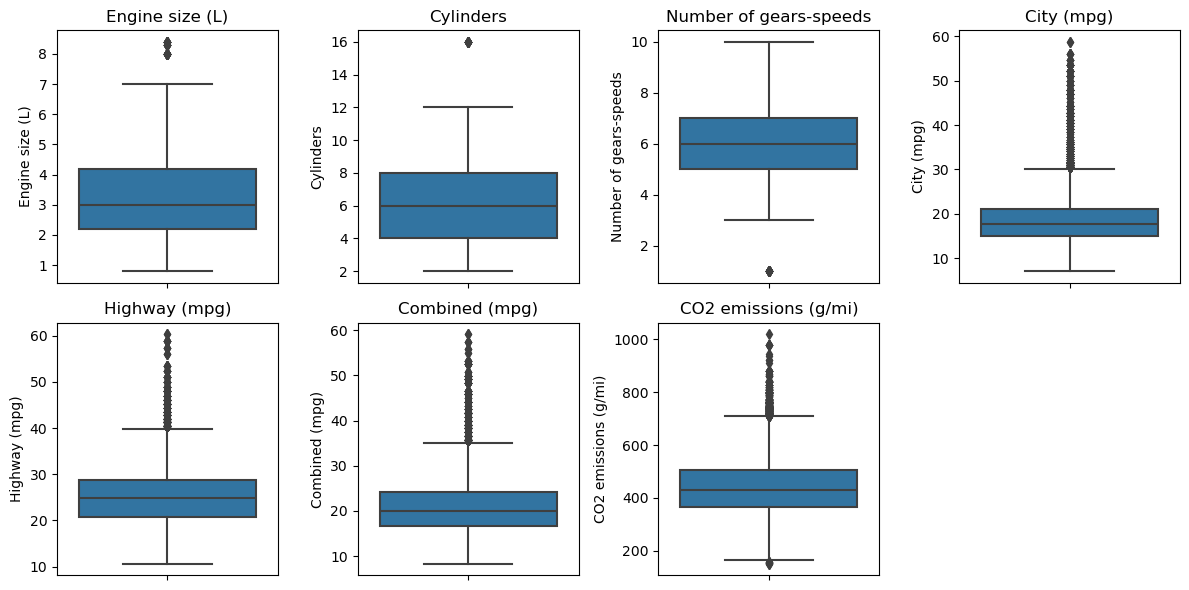

In [53]:
# Boxplots to visualize outliers
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=cdf[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

When there's a good reason, dropping outliers is a common practice to prevent faulty analysis- like when they can be related to data collected by faulty sensors. There are noticable outliers that deserve attention. These include:

- Engine Size and Cylinders include extreme records that upon reviewing the data we can tell they are genuine records- e.g., supersport cars.
- There are several cars with just one gear/speed. These should be investigated.
- consumption variables include values up to 3 times the center. While there are ICEVs with very high MPGs, this need to be check. For the extreme values around 60 are more likely to be hybrid cars. In this analysis, I want to exclude them for they would negatively impact model training if there is no variable to distinguish them.
- CO2 emissions includes 371 outliers. These are probably related to sport cars, trucks, or SUV. They need to be explored too.

Let's begin with `Number of gears-speeds`.

There was also values < 2 for the `Number of gears-speeds` variable:

In [57]:
cdf["Number of gears-speeds"][cdf["Number of gears-speeds"] < 2].sum()

28

In [59]:
cdf[cdf["Number of gears-speeds"] < 2].head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission type,Number of gears-speeds,Fuel type,City (mpg),Highway (mpg),Combined (mpg),CO2 emissions (g/mi)
24711,2021,Hyundai,Elantra,Mid-size,2.0,4,AV,1,X,31.36,41.27,34.97,252.67
24712,2021,Hyundai,Elantra (ISG),Mid-size,2.0,4,AV,1,X,33.13,42.77,36.64,244.62
24735,2021,Hyundai,Venue,Mid-size,1.6,4,AV,1,X,29.77,33.60,31.64,286.46
24804,2021,Kia,Rio,Compact,1.6,4,AV,1,X,32.67,39.20,34.97,255.89
25686,2022,Hyundai,Elantra,Mid-size,2.0,4,AV,1,X,30.95,41.27,34.97,254.28


In [61]:
# Make an independent copy
cdf_prepared = cdf.copy()

# Calculate the median of `Number of gears-speeds` (excluding values < 2)
median_gears = cdf_prepared[cdf_prepared["Number of gears-speeds"] >= 2]["Number of gears-speeds"].median()

# Replace values under 2 with the median (modifies in place)
cdf_prepared.loc[cdf_prepared["Number of gears-speeds"] < 2, "Number of gears-speeds"] = median_gears

Let's deal with high consumption cars.

Upon reviewing `Model` variable, I realized 418 records have the term *"hybrid"* in their description! I didn't expect this since the source provide a separate dataset for hybric cars. Let's remove them.

I checked for online sources to find records of hybrid cars and use it as a filter to remove them from my dataset. Unfortunately, I couldn't find a comprehensive dataset that goes back to 1995. Even the available dataset on the source's website only goes back to 2013 with 351 records that most of the model values were absent from here. The U.S. EPA and DOT also have records, but they were only partially helpful. So I decided to make my own solution, which might be imperfect.  

In [64]:
# Remove models containing "Hybrid" (case-insensitive)
cdf_filtered = cdf_prepared[~cdf_prepared["Model"].str.contains("hybrid", case=False, na=False)]

# Print how many rows were removed
print(f"Original dataset size: {cdf.shape[0]}")
print(f"Filtered dataset size: {cdf_filtered.shape[0]}")
print(f"Rows removed due to outliers: {cdf.shape[0] - cdf_filtered.shape[0]}")

Original dataset size: 28384
Filtered dataset size: 27966
Rows removed due to outliers: 418


Next, I need to remove other possible hybrid cars that don't mention the term in their `Model` variable- like Toyota Prius. Hybrid cars from 1995 to 2005 have significantly higher mpgs, particularly in city conditions (source). While non-hybrid cars can also achieve high mpgs, a high mpg is a good initial marker. To identify potential hybrid cars in the dataset, I look into vehicles with `City (mpg)` equal or greater than 32. From there, I mannually inspect unique records to make sure I do not remove a non-hybrid car.

In [67]:
# Find unique model names with `Combined (mpg) >= 32`
high_mpg_models = cdf_filtered[cdf_filtered["City (mpg)"] >= 32]["Model"].unique()
high_mpg_models

array(['Metro', 'Firefly', 'Golf TDI Diesel', 'Jetta TDI Diesel',
       'Passat TDI Diesel', 'Passat Wagon TDI Diesel',
       'New Beetle TDI Diesel', 'New Golf TDI Diesel',
       'New Jetta TDI Diesel', 'Insight', 'Prius',
       'Jetta Wagon TDI Diesel', 'fortwo CDI', 'fortwo CDI cabriolet',
       'fortwo convertible', 'fortwo coupe', 'fortwo', 'fortwo cabriolet',
       'Insight EX', 'HS 250h', 'CR-Z', 'Insight DX/LX', 'CT 200h',
       'Insight LX', 'iQ', 'Prius c', 'Prius v', 'ES 300h', 'Versa',
       'Mirage', 'Fit', 'NX 300h AWD', 'Yaris', 'IONIQ', 'IONIQ Blue',
       'Niro', 'Niro FE', 'Niro Touring', 'Mirage G4', 'Insight Touring',
       'UX 250h', 'UX 250h AWD', 'Prius AWD', 'Insight EX/Touring',
       'Accent', 'Rio', 'Elantra (ISG)', 'Sienna', 'Sienna AWD',
       'Venza AWD', 'NX 350h AWD', 'RX 350h AWD', 'Crown AWD',
       'Elantra (Stop/Start)', 'Sentra', 'UX 300h AWD', 'Camry',
       'Camry AWD SE/XLE', 'Camry AWD XSE', 'Crown Signia AWD'],
      dtype=object)

I checkeed all the list items and identified hybrid cars.

In [70]:
# Manually remove known non-hybrids from the above list (informed by online search)
hybrid_models = ['CR-Z', 'Crown AWD', 'Crown Signia AWD',
                 'ES 300h', 'HS 250h', 'IONIQ', 'IONIQ Blue', 
                 'Insight', 'Insight DX/LX', 'Insight EX', 
                 'Insight EX/Touring', 'Insight LX', 'Insight Touring', 
                 'NX 300h AWD', 'NX 350h AWD', 'Niro', 'Niro FE', 'Niro Touring', 
                 'Prius', 'Prius AWD', 'Prius c', 'Prius v', 'RX 350h AWD',
                 'Sienna', 'Sienna AWD', 'UX 250h', 'UX 250h AWD', 'UX 300h AWD', 'Venza AWD']

Let's see the list of hybrid models that don't contain the term in the `Model` description:

In [73]:
# Show the hybrid models and their "Make" values
hybrid_models_df = cdf_filtered[cdf_filtered["Model"].isin(hybrid_models)][["Make", "Model"]].drop_duplicates()

# Sort alphabetically
hybrid_models_df = hybrid_models_df.sort_values(by=["Make", "Model"])

# Convert to single formatted string
hybrid_models_str = ", ".join(hybrid_models_df["Make"] + " " + hybrid_models_df["Model"])

# Print result
print("Models identified manually as hybrids (sorted):")
print(hybrid_models_str)

Models identified manually as hybrids (sorted):
Honda CR-Z, Honda Insight, Honda Insight DX/LX, Honda Insight EX, Honda Insight EX/Touring, Honda Insight LX, Honda Insight Touring, Hyundai IONIQ, Hyundai IONIQ Blue, Kia Niro, Kia Niro FE, Kia Niro Touring, Lexus ES 300h, Lexus HS 250h, Lexus NX 300h AWD, Lexus NX 350h AWD, Lexus RX 350h AWD, Lexus UX 250h, Lexus UX 250h AWD, Lexus UX 300h AWD, Toyota Crown AWD, Toyota Crown Signia AWD, Toyota Prius, Toyota Prius AWD, Toyota Prius c, Toyota Prius v, Toyota Sienna, Toyota Sienna AWD, Toyota Venza AWD


Beside these, all 2025 Toyota Camry vehicles are hybrid (Not mentioned in the `Model`). They also need to be removed.

In [76]:
# Remove the remaining models from `cdf`
cdf_filtered = cdf_filtered[~cdf_filtered["Model"].isin(hybrid_models)]

# Remove only 2025 Toyota Camry models
cdf_filtered = cdf_filtered[~((cdf_filtered["Model year"] == 2025) & 
                        (cdf_filtered["Make"] == "Toyota") & 
                        (cdf_filtered["Model"].str.contains("Camry", case=False, na=False)))]

# Print how many rows were removed
print(f"Original dataset size: {cdf.shape[0]}")
print(f"Filtered dataset size: {cdf_filtered.shape[0]}")
print(f"Total Rows removed due to outliers: {cdf.shape[0] - cdf_filtered.shape[0]}")

Original dataset size: 28384
Filtered dataset size: 27742
Rows removed due to outliers: 642


Now, let's look at the cars with extreme CO2 emissions. What can one learn from those with emissions above 900 (g/mi)?

In [78]:
# Filter records where CO2 emissions are above 900
high_emission_records = cdf_filtered[cdf_filtered['CO2 emissions (g/mi)'] > 900]

# Select only numerical columns
numerical_features = high_emission_records.select_dtypes(include=['number'])

high_emission_records.describe()

,Model year,Engine size (L),Cylinders,Number of gears-speeds,City (mpg),Highway (mpg),Combined (mpg),CO2 emissions (g/mi)
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2015.333333,7.675000,14.333333,6.333333,7.805833,11.612500,9.090833,960.375833
std,9.613753,0.912663,2.534609,1.154701,0.298160,0.565237,0.239600,32.479950
min,2000.000000,5.500000,10.000000,4.000000,7.060000,11.250000,8.330000,910.890000
25%,2005.750000,8.000000,12.000000,6.000000,7.760000,11.250000,9.160000,933.017500
50%,2021.500000,8.000000,16.000000,7.000000,7.760000,11.360000,9.160000,978.480000
75%,2023.000000,8.000000,16.000000,7.000000,7.860000,11.650000,9.160000,978.480000
max,2025.000000,8.300000,16.000000,7.000000,8.250000,13.000000,9.160000,1018.720000


In [80]:
# Get unique values for 'Make' and 'Vehicle class' where CO2 emissions > 900
unique_makes = high_emission_records['Make'].unique()
unique_vehicle_classes = high_emission_records['Vehicle class'].unique()

print(unique_makes)
print(unique_vehicle_classes)

['Ferrari' 'Dodge' 'Bugatti']
['Subcompact' 'Two-seater' 'Pickup truck: Standard']


Upon further exploration of these vehicles, I found out they are genuine records of, for instance high-end supersport cars and pickup trucks and the reported CO2 values are correct.

When there's a good reason, dropping outliers is a common practice to prevent faulty analysis- like when the can be related to data collected by faulty sensors. In our case, I decided to keep CO2 outliers for two reasons:
- The data collection seems sound and the records are for real cars. As such, they can provide valuable information to develop a more robust model.
- There are ways to ensure the prediction model would not be affected negatively by the outliers. I will apply these in the modeling sections- For instance, Ridge modeling to account for overfitting.

Now, let's inspect our data visually again.

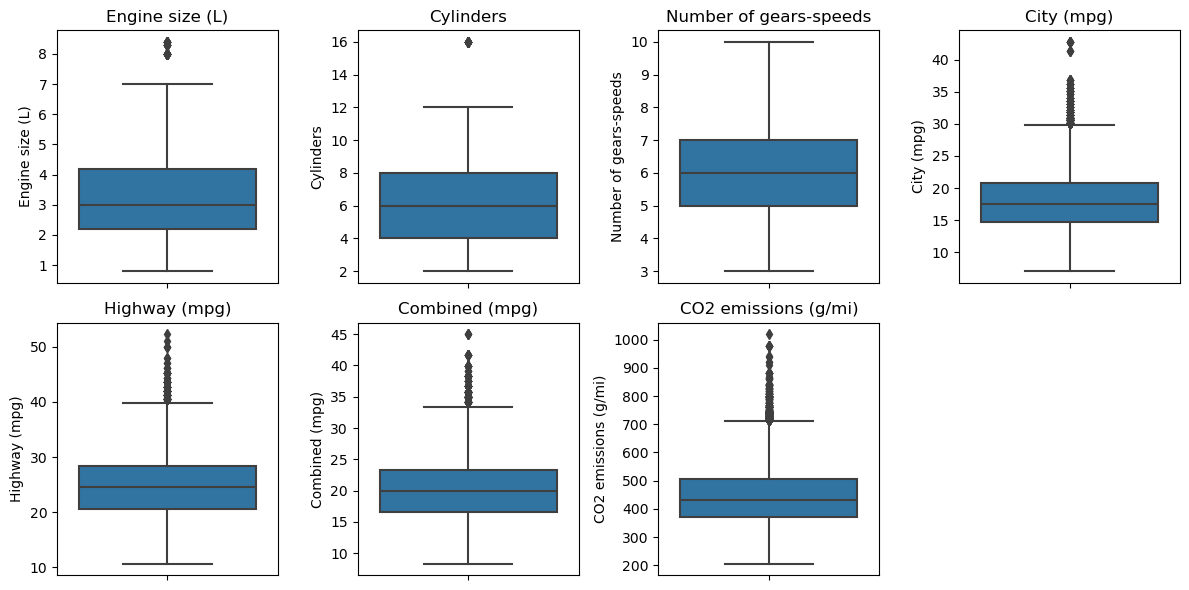

In [85]:
# Boxplots to visualize outliers
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=cdf_filtered[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

While there still are significant outliers, they represent important real variation that can contribute to a better prediction for extreme cases.

<h3>Checking for Null values</h3> 

In [89]:
cdf_filtered.isnull().sum()

Model year                0
Make                      0
Model                     0
Vehicle class             0
Engine size (L)           0
Cylinders                 0
Transmission type         0
Number of gears-speeds    0
Fuel type                 0
City (mpg)                0
Highway (mpg)             0
Combined (mpg)            0
CO2 emissions (g/mi)      0
dtype: int64

Since there is no missing value, let's move on.

<h3>Checking for Duplicates</h3> 

In [93]:
# Check for duplicate rows
cdf_filtered.duplicated().sum()

0

Now that the data is cleaned, let's save the cleaned data before moving to the next step.

In [96]:
cdf_filtered.to_csv("CO2/data/cleaned_data_wx.csv", index=False)
print("Cleaned data saved successfully!")

Cleaned data saved successfully!


<div style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 15px; 
    border-radius: 5px; 
    font-size: 24px;
    font-weight: bold;
    margin-top: 20px;">
    <h2 id="eda" style="margin: 0; padding: 5px 10px;">4. Explanatory Data Analysis (EDA)</h2>
</div>

Here, I will focus on EDA to see what relationships and trends I can learn from the data. After seeing an overview of the data, I will look into three aspects:
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

Let's check the data using `.info()` function:

In [100]:
cdf = cdf_filtered.copy()
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27742 entries, 0 to 28383
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model year              27742 non-null  int64  
 1   Make                    27742 non-null  object 
 2   Model                   27742 non-null  object 
 3   Vehicle class           27742 non-null  object 
 4   Engine size (L)         27742 non-null  float64
 5   Cylinders               27742 non-null  int64  
 6   Transmission type       27742 non-null  object 
 7   Number of gears-speeds  27742 non-null  int64  
 8   Fuel type               27742 non-null  object 
 9   City (mpg)              27742 non-null  float64
 10  Highway (mpg)           27742 non-null  float64
 11  Combined (mpg)          27742 non-null  float64
 12  CO2 emissions (g/mi)    27742 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 3.0+ MB


<h3>Univariate Analysis</h3> 

Let's check eight numerical variables:

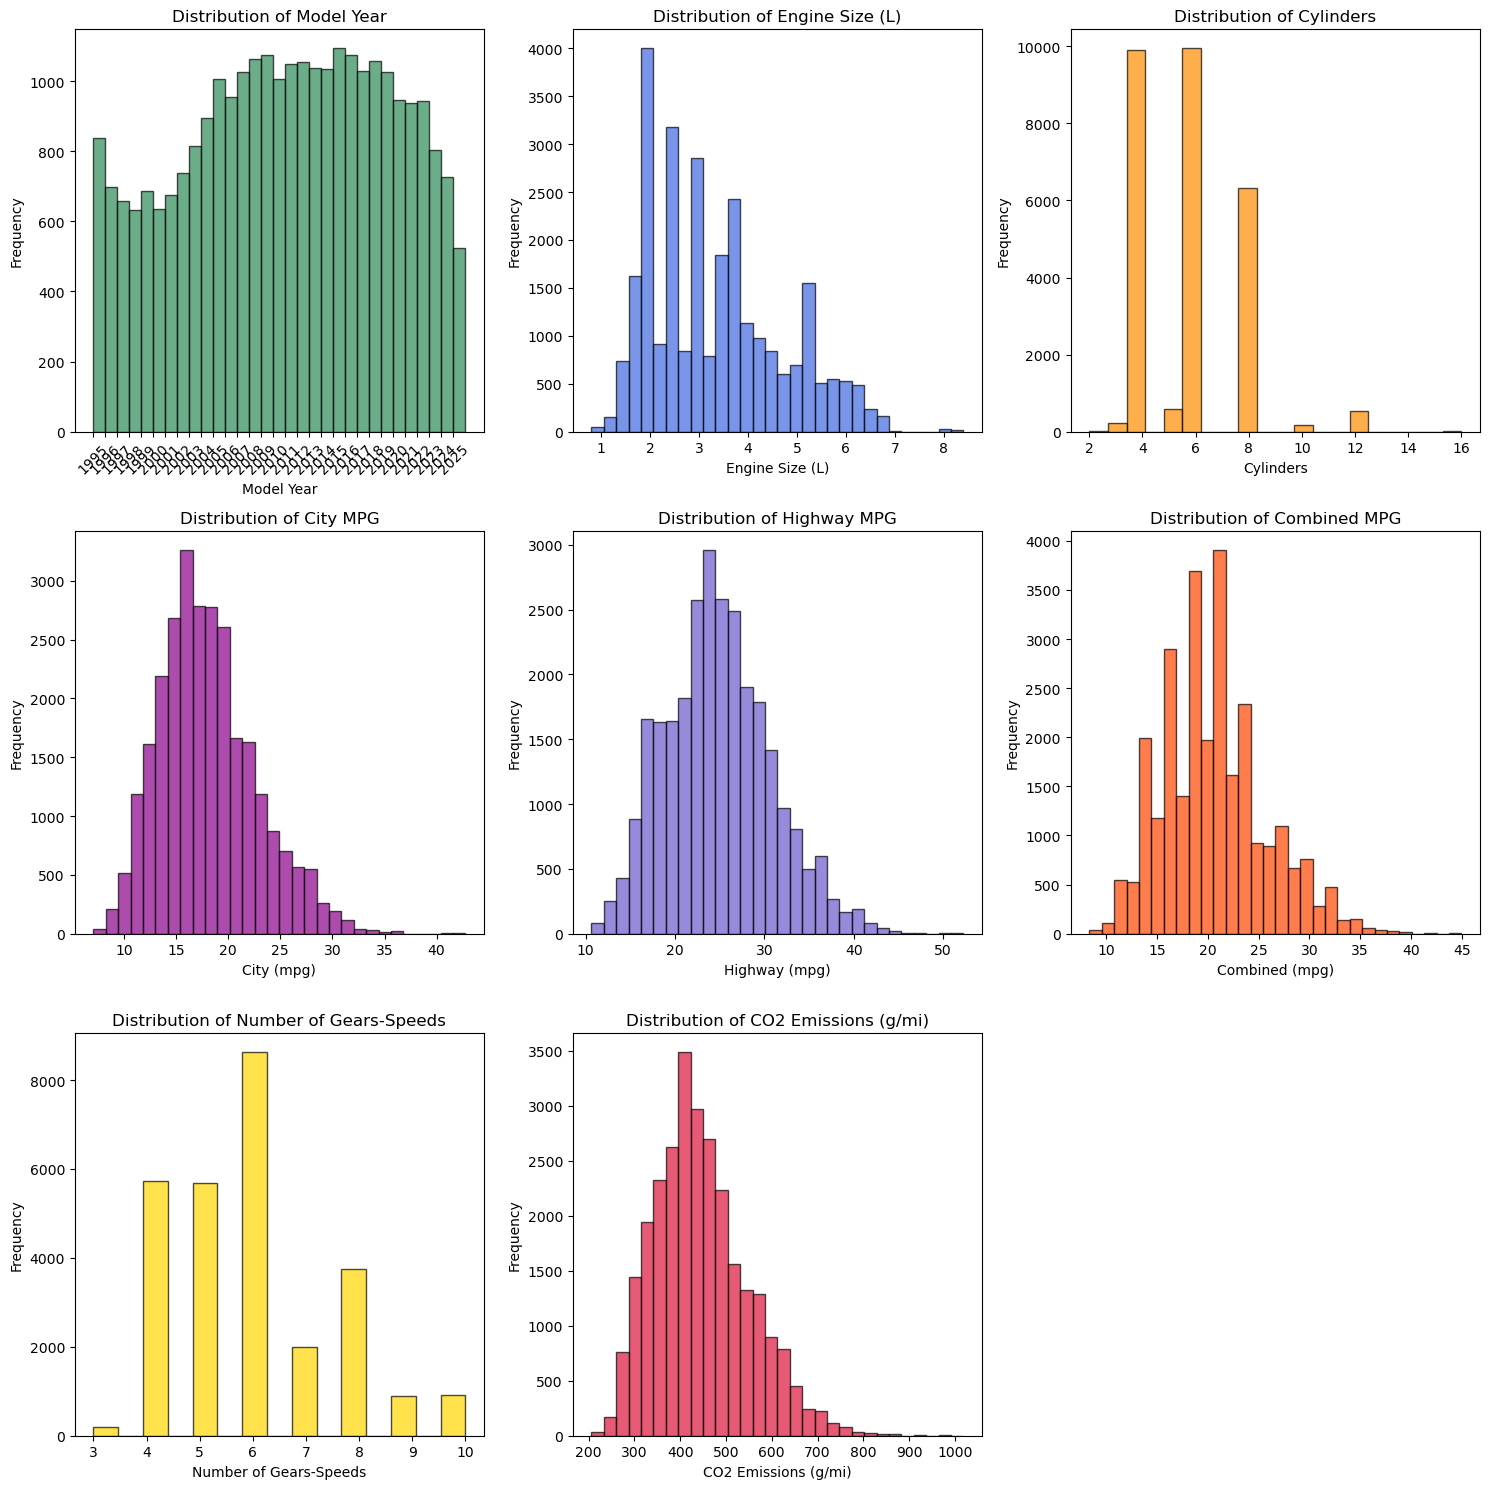

In [104]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Histogram for "Model Year"
# Ensure each Model Year is in its own bin
unique_years = sorted(cdf["Model year"].dropna().unique())  # Get sorted unique years
bins = range(min(unique_years), max(unique_years) + 2)  # Create bins for each year

axes[0, 0].hist(cdf["Model year"].dropna(), bins=bins, color="seagreen", edgecolor="black", alpha=0.7)
axes[0, 0].set_title("Distribution of Model Year")
axes[0, 0].set_xlabel("Model Year")
axes[0, 0].set_ylabel("Frequency")

# Adjust x-axis ticks to show each year clearly
axes[0, 0].set_xticks(unique_years)
axes[0, 0].tick_params(axis='x', rotation=45)  # Rotate labels for better visibility

# Histogram for Engine Size
axes[0, 1].hist(cdf["Engine size (L)"].dropna(), bins=30, color="royalblue", edgecolor="black", alpha=0.7)
axes[0, 1].set_title("Distribution of Engine Size (L)")
axes[0, 1].set_xlabel("Engine Size (L)")
axes[0, 1].set_ylabel("Frequency")

# Histogram for Cylinders
axes[0, 2].hist(cdf["Cylinders"].dropna(), bins=20, color="darkorange", edgecolor="black", alpha=0.7)
axes[0, 2].set_title("Distribution of Cylinders")
axes[0, 2].set_xlabel("Cylinders")
axes[0, 2].set_ylabel("Frequency")

# Histogram for City MPG
axes[1, 0].hist(cdf["City (mpg)"].dropna(), bins=30, color="#8B008B", edgecolor="black", alpha=0.7) #Colore = Dark Magenta
axes[1, 0].set_title("Distribution of City MPG")
axes[1, 0].set_xlabel("City (mpg)")
axes[1, 0].set_ylabel("Frequency")

# Histogram for Highway MPG
axes[1, 1].hist(cdf["Highway (mpg)"].dropna(), bins=30, color="#6A5ACD", edgecolor="black", alpha=0.7) #Colore = Slate Blue
axes[1, 1].set_title("Distribution of Highway MPG")
axes[1, 1].set_xlabel("Highway (mpg)")
axes[1, 1].set_ylabel("Frequency")

# Histogram for Combined MPG
axes[1, 2].hist(cdf["Combined (mpg)"].dropna(), bins=30, color="#FF4500", edgecolor="black", alpha=0.7) #Colore = Orange Red
axes[1, 2].set_title("Distribution of Combined MPG")
axes[1, 2].set_xlabel("Combined (mpg)")
axes[1, 2].set_ylabel("Frequency")

# Histogram for "Number of Gears-Speeds"
axes[2, 0].hist(cdf["Number of gears-speeds"].dropna(), bins=15, color="#FFD700", edgecolor="black", alpha=0.7) #Colore = Gold
axes[2, 0].set_title("Distribution of Number of Gears-Speeds")
axes[2, 0].set_xlabel("Number of Gears-Speeds")
axes[2, 0].set_ylabel("Frequency")

# Histogram for CO2 Emissions
axes[2, 1].hist(cdf["CO2 emissions (g/mi)"].dropna(), bins=30, color="crimson", edgecolor="black", alpha=0.7)
axes[2, 1].set_title("Distribution of CO2 Emissions (g/mi)")
axes[2, 1].set_xlabel("CO2 Emissions (g/mi)")
axes[2, 1].set_ylabel("Frequency")

# Hide the empty 9th plot
fig.delaxes(axes[2, 2])

# Adjust layout for better readability
plt.tight_layout()
plt.show()


**Observations:**
- `Model year` is right-skewed: more recent cars dominate. 
- Most vehicles have small engine sizes with very few above 6.5L.
- Most cars have 4, 6, or 8 cylinders abd higher cylinders (10, 12, 16) are rare.
- MPG (city, highway, combined) does not have a normal distribution and has some extreme values. Since hybrid cars were removed, these are high-efficiency cars.
- Most cars have 6 gears/speed or less.
- CO₂ emissions appear right-skewed, with most values clustering at lower emissions.


Let's check categorical variables now.

In [108]:
# Count unique values per categorical column
categorical_cols = ["Make", "Model", 'Vehicle class', "Transmission type", "Fuel type"]

cdf[categorical_cols].nunique()

Make                   55
Model                4257
Vehicle class          17
Transmission type       5
Fuel type               5
dtype: int64

I will focus on the last three.

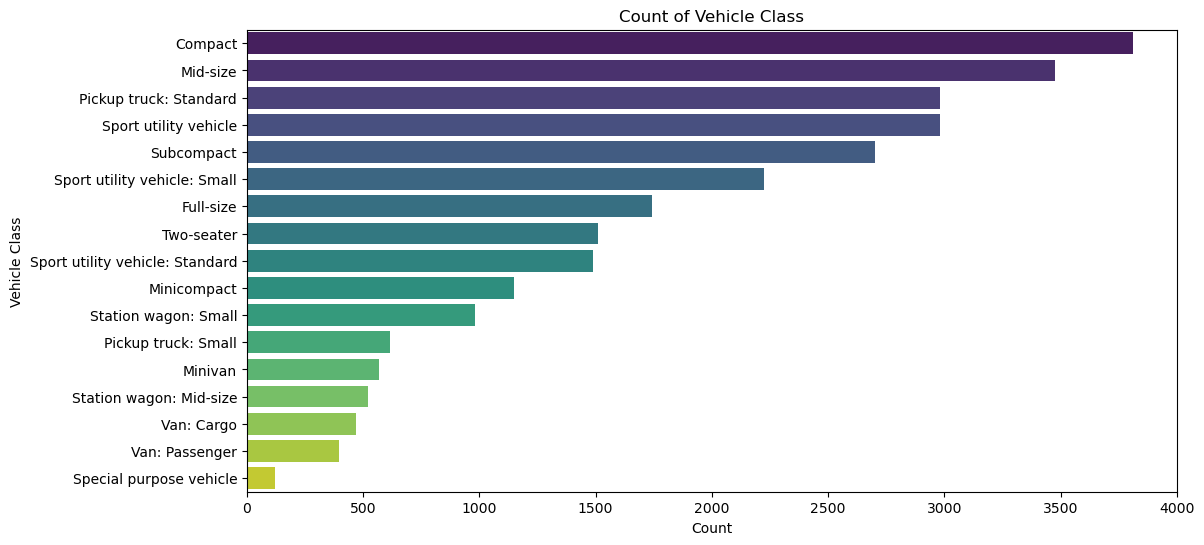

In [111]:
# Bar plot for Count of Vehicle Class

plt.figure(figsize=(12, 6))
order = cdf["Vehicle class"].value_counts().index  # Order by frequency
sns.countplot(y=cdf["Vehicle class"], order=order, palette="viridis")
plt.title("Count of Vehicle Class")
plt.xlabel("Count")
plt.ylabel("Vehicle Class")
plt.show()

**Observations:**
- Compact and Mid-size cars are the most frequent, suggesting a dataset dominated by passenger cars.
- Standard Pickup Trucks and SUVs also have high representation.
- Special Purpose Vehicles, Vans (Passenger & Cargo), and Station Wagons have the lowest counts- probably due to lower consumer demand.
- Standard Pickup Trucks are more common than Small Pickups.

Mmre order and insights might be gained by transofrming the `Vehicle class` and forming a simpler categorization. However, I decided not to follow this path for now.

**Fuel Type**

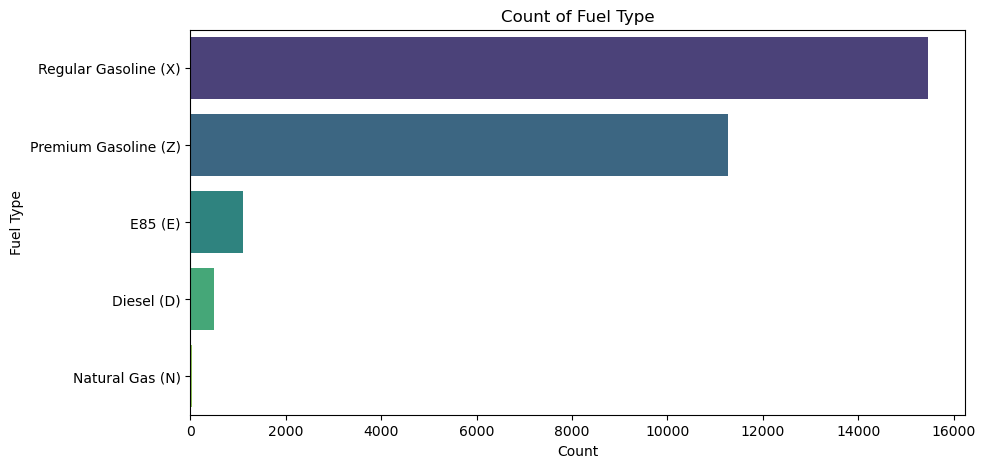

In [115]:
# Mapping fuel type codes to their labels
fuel_type_labels = {"X": "Regular Gasoline (X)", "Z": "Premium Gasoline (Z)", "D": "Diesel (D)", "E": "E85 (E)", "N": "Natural Gas (N)"}

# Bar plot for Fuel Type count
plt.figure(figsize=(10, 5))
order = cdf["Fuel type"].map(fuel_type_labels).value_counts().index  # Order by frequency
sns.countplot(y=df["Fuel type"].map(fuel_type_labels), order=order, palette="viridis")
plt.title("Count of Fuel Type")
plt.xlabel("Count")
plt.ylabel("Fuel Type")
plt.show()

The U.S. Department of Energy (DOE) says: "E85 (or Flex Fuel) is a term that refers to high-level ethanol-gasoline blends containing 51% to 83% ethanol, depending on geography and season. For more information, check [Fuel Properties](https://afdc.energy.gov/fuels/fuel_properties.php) and [E85 Flex Fuel Specification](https://afdc.energy.gov/fuels/ethanol-e85-specs).

**Observations:**
- Most dataset's cars use gas (regular and premium), suggesting traditional ICEVs are the vast majority of records.
- cars using flex fuel or diesel are less common.
- A rare set of cars use natural gas.
- Since gasoline is dominant, MPGs and CO₂ emission trends will mostly reflect gasoline vehicles.

<h3>Transmission Type</h3> 

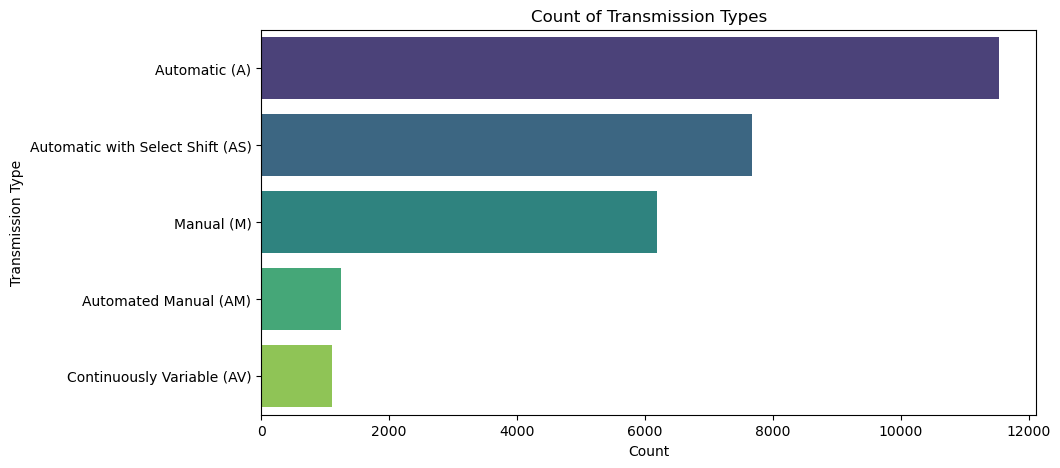

In [119]:
# Define transmission code labels for display only (not modifying data)
transmission_labels = {
    "A": "Automatic (A)",
    "AM": "Automated Manual (AM)",
    "AS": "Automatic with Select Shift (AS)",
    "AV": "Continuously Variable (AV)",
    "M": "Manual (M)"
}

# Create a count plot for transmission types
plt.figure(figsize=(10, 5))
order = cdf["Transmission type"].value_counts().index  # Order by frequency
ax = sns.countplot(y=cdf["Transmission type"], order=order, palette="viridis")

# Replace y-axis labels with descriptive names
ax.set_yticklabels([transmission_labels.get(label, label) for label in order])

# Set labels and title
plt.title("Count of Transmission Types")
plt.xlabel("Count")
plt.ylabel("Transmission Type")

# Show the plot
plt.show()

**Observations:**
- Standard Automatic (A) and Automatic with Select Shift (AS) are the most common. This reflects industry trends, where automatics are preferred due to ease of use and fuel efficiency improvements.
- Manual (M) transmissions still have a noticeable share, but they are much less common than automatics. This aligns with consumer preference shifts, particularly in the U.S.
- Automated Manual (AM) and Continuously Variable (AV) transmissions are the least common. CVTs are generally found in hybrids and economy cars, but they are still underrepresented here.

<h3>Bivariate Analysis</h3>

First, I will check the relationship between CO2 emissions and the numerical variables.

<h3>Correlation Matrix</h3> 

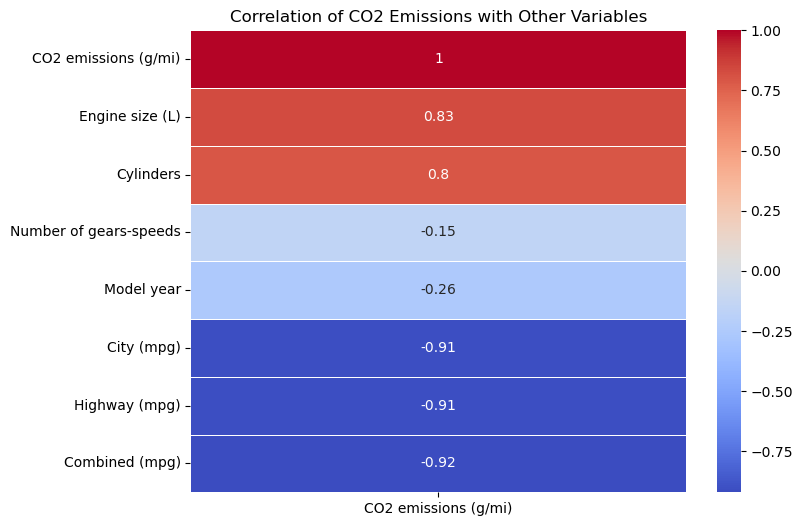

In [125]:
# Select only numeric columns
numeric_cdf = cdf.select_dtypes(include=['number'])

# Compute correlation matrix focusing on CO2 emissions
correlation_matrix = numeric_cdf.corr()

# Extract correlation values for CO2 emissions
co2_correlations = correlation_matrix["CO2 emissions (g/mi)"].sort_values(ascending=False)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[["CO2 emissions (g/mi)"]].sort_values(by="CO2 emissions (g/mi)", ascending=False), 
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of CO2 Emissions with Other Variables")
plt.show()

**Correlation Insights with CO₂ Emissions:**
- Strong Positive Correlation with Engine Size (0.83) & Cylinders (0.80)
    - Larger engines with more cylinders generally produce higher emissions due to higher fuel consumption.
- Strong Negative Correlation with Fuel Efficiency (MPG) (~-0.91 to -0.92)
    - As fuel efficiency increases (higher MPG), CO₂ emissions decrease significantly.
- Weak Negative Correlation with Model Year (-0.26)
    - Newer model years tend to have lower CO₂ emissions, likely due to technological advancements and stricter emissions regulations.
    - The correlation is not very strong, suggesting that other factors (engine size, fuel type) play a larger role.
- Weak Negative Correlation with Number of Gears (-0.15)
    - Higher gear counts slightly reduce emissions, but the effect is weak.
    - Modern vehicles with more gears optimize fuel efficiency, but it’s not a major determining factor for CO₂ emissions.

In [128]:
correlation_matrix

,Model year,Engine size (L),Cylinders,Number of gears-speeds,City (mpg),Highway (mpg),Combined (mpg),CO2 emissions (g/mi)
Model year,1.000000,-0.061150,-0.045283,0.773562,0.268576,0.248363,0.262721,-0.256564
Engine size (L),-0.061150,1.000000,0.910163,0.002665,-0.801526,-0.757978,-0.795982,0.832686
Cylinders,-0.045283,0.910163,1.000000,0.053900,-0.759640,-0.700287,-0.747674,0.796120
Number of gears-speeds,0.773562,0.002665,0.053900,1.000000,0.148876,0.162185,0.154241,-0.153010
City (mpg),0.268576,-0.801526,-0.759640,0.148876,1.000000,0.948382,0.991815,-0.907839
Highway (mpg),0.248363,-0.757978,-0.700287,0.162185,0.948382,1.000000,0.977763,-0.912371
Combined (mpg),0.262721,-0.795982,-0.747674,0.154241,0.991815,0.977763,1.000000,-0.919932
CO2 emissions (g/mi),-0.256564,0.832686,0.796120,-0.153010,-0.907839,-0.912371,-0.919932,1.000000


**New Observations:**
- Strong Positive Correlations (Highly Related Features)
    - Engine Size (L) & Cylinders (0.91) → Larger engines typically have more cylinders.
        - Strong collinearity
    - City, Highway, and Combined MPG (~0.99) → Strong interdependence, as expected in fuel efficiency metrics.
        - Extreme collinearity
    - CO₂ Emissions & Engine Size (0.83), Cylinders (0.80) → Bigger engines with more cylinders emit more CO₂.
    - Model Year & Number of Gears (0.77) → Newer cars tend to have more gears, likely for fuel efficiency improvements.
        - Moderate collinearity
- Strong Negative Correlations (Inverse Relationships)
    - Fuel Efficiency (MPG) & CO₂ Emissions (~-0.91 to -0.92) → Higher MPG means lower CO₂ emissions.
    - Engine Size vs. City MPG (-0.80) & Highway MPG (-0.76) → Bigger engines reduce fuel efficiency.
    - Cylinders vs. City MPG (-0.76) & Highway MPG (-0.70) → More cylinders also lower efficiency.
- Weak or Moderate Correlations
    - Model Year & CO₂ Emissions (-0.25) → Newer models slightly reduce emissions, but the effect is weak.
    - Number of Gears & CO₂ Emissions (-0.15) → More gears slightly reduce emissions but are not a major factor.

An interesting point here is that while `Model year` and `CO2 emissions` have a week negative correlation, `Model year` and `Number of gears-speeds` have a strong positive correlation.
This means, while a newer model tend to have more gears and less emissions. Nonetheless, a new model that has equal or fewer gears than a similar older one **might not** emit less emissions. Since *correlation is not causation*, we cannot say more.  

Collinearity refers to high correlations between independent variables (features), which can cause instability in certain Machine Learning models. These need to be addressed later.

Let's check four figures to see these insights visually.

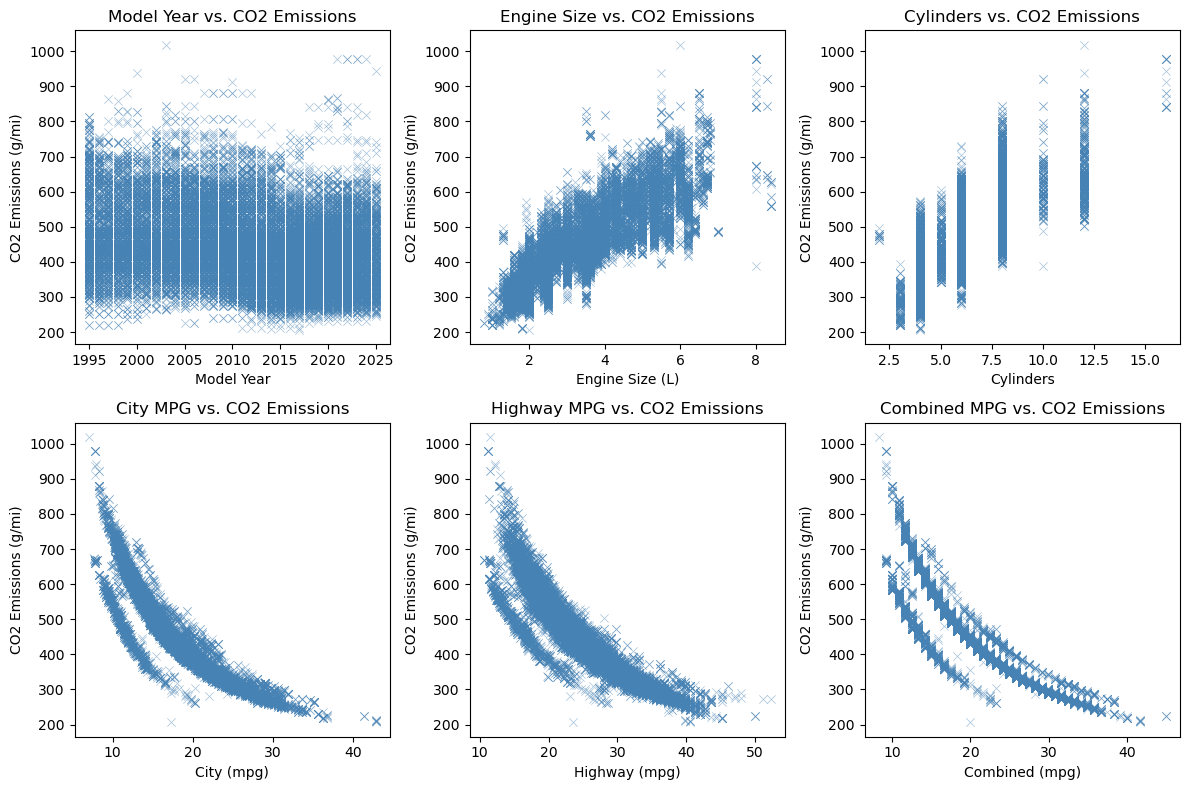

In [132]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Common settings
scatter_kws = {'alpha': 0.5, 'marker': 'x', 'color': '#4682B4'}  # Cross marker, blue color

# Model Year vs. CO2 Emissions (instead of Model Year)
sns.scatterplot(x=cdf["Model year"], y=cdf["CO2 emissions (g/mi)"], ax=axes[0, 0], **scatter_kws)
axes[0, 0].set_title("Model Year vs. CO2 Emissions")
axes[0, 0].set_xlabel("Model Year")
axes[0, 0].set_ylabel("CO2 Emissions (g/mi)")

# Engine Size vs. CO2 Emissions
sns.scatterplot(x=cdf["Engine size (L)"], y=cdf["CO2 emissions (g/mi)"], ax=axes[0, 1], **scatter_kws)
axes[0, 1].set_title("Engine Size vs. CO2 Emissions")
axes[0, 1].set_xlabel("Engine Size (L)")
axes[0, 1].set_ylabel("CO2 Emissions (g/mi)")

# Cylinders vs. CO2 Emissions
sns.scatterplot(x=cdf["Cylinders"], y=cdf["CO2 emissions (g/mi)"], ax=axes[0, 2], **scatter_kws)
axes[0, 2].set_title("Cylinders vs. CO2 Emissions")
axes[0, 2].set_xlabel("Cylinders")
axes[0, 2].set_ylabel("CO2 Emissions (g/mi)")

# City MPG vs. CO2 Emissions
sns.scatterplot(x=cdf["City (mpg)"], y=cdf["CO2 emissions (g/mi)"], ax=axes[1, 0], **scatter_kws)
axes[1, 0].set_title("City MPG vs. CO2 Emissions")
axes[1, 0].set_xlabel("City (mpg)")
axes[1, 0].set_ylabel("CO2 Emissions (g/mi)")

# Highway MPG vs. CO2 Emissions
sns.scatterplot(x=cdf["Highway (mpg)"], y=cdf["CO2 emissions (g/mi)"], ax=axes[1, 1], **scatter_kws)
axes[1, 1].set_title("Highway MPG vs. CO2 Emissions")
axes[1, 1].set_xlabel("Highway (mpg)")
axes[1, 1].set_ylabel("CO2 Emissions (g/mi)")

# Combined MPG vs. CO2 Emissions
sns.scatterplot(x=cdf["Combined (mpg)"], y=cdf["CO2 emissions (g/mi)"], ax=axes[1, 2], **scatter_kws)
axes[1, 2].set_title("Combined MPG vs. CO2 Emissions")
axes[1, 2].set_xlabel("Combined (mpg)")
axes[1, 2].set_ylabel("CO2 Emissions (g/mi)")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

These figures illustrate the correlation between the variables and CO2 emissions and shows the points discussed visually. Other observations include:
- High variance in `Model year` vs. `CO2 emissions`: Despite a slight overall decline, high-emission vehicles still exist in newer cars- likely due to large engines and trucks/SUVs.
- Engine Size vs. CO₂ Emissions: there are relatively few cars beyond 7L engine size, with a high variance.
- Cylinders vs. CO₂ Emissions: emissions increases as, not smoothly but rather in clusters (e.g., V4, V6, V8).
- MPGs vs. CO₂ Emissions: the curved relationships point to non-linearity and suggest diminishing returns— improvements in high-MPG vehicles impact emissions less.
- Combined MPG vs. CO₂ Emissions: most structured inverse relationship (strongest correlation).

Now, it's time to see how categorical variables relate to CO2 emissions.

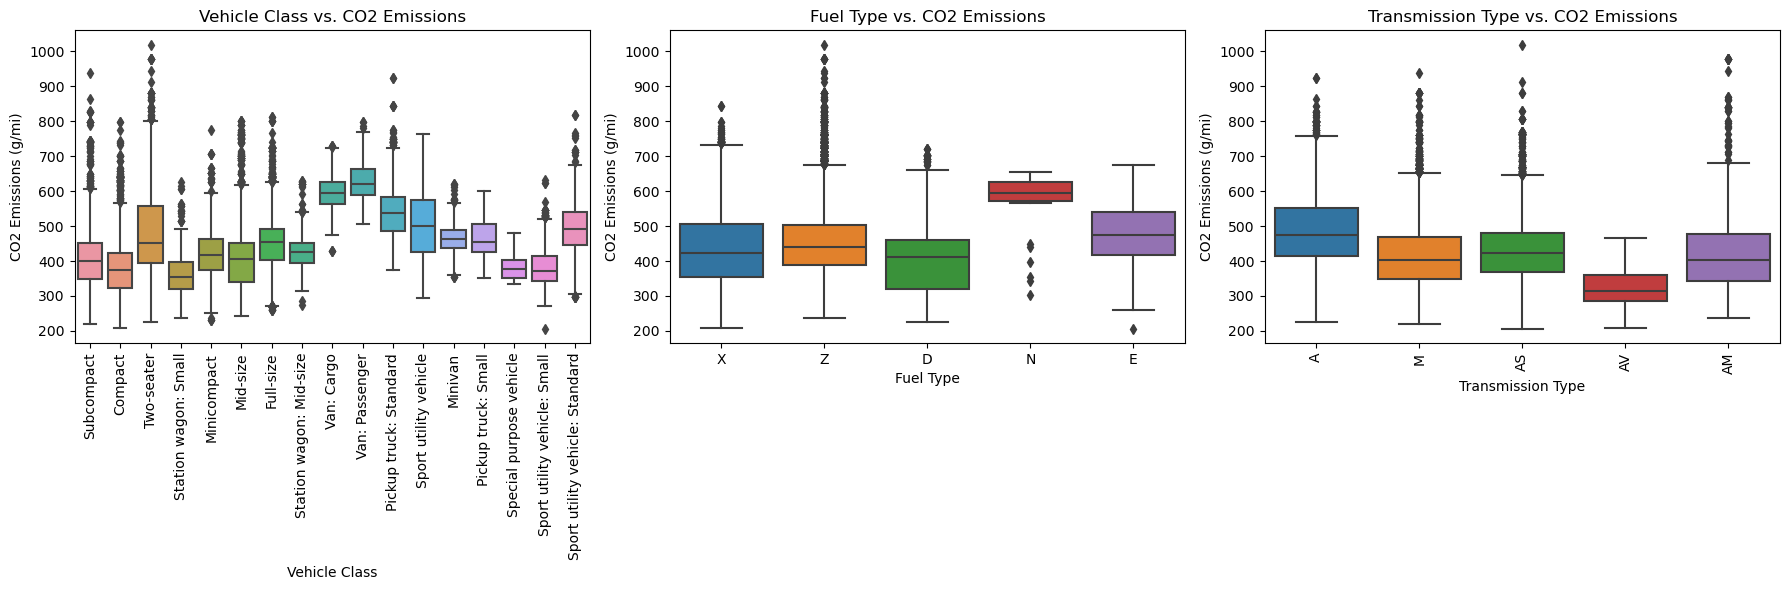

In [136]:
# Boxplots to compare categorical variables with CO2 emissions

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Vehicle Class vs. CO2 Emissions
sns.boxplot(x=cdf["Vehicle class"], y=cdf["CO2 emissions (g/mi)"], ax=axes[0])
axes[0].set_title("Vehicle Class vs. CO2 Emissions")
axes[0].set_xlabel("Vehicle Class")
axes[0].set_ylabel("CO2 Emissions (g/mi)")
axes[0].tick_params(axis='x', rotation=90)

# Fuel Type vs. CO2 Emissions
sns.boxplot(x=cdf["Fuel type"], y=cdf["CO2 emissions (g/mi)"], ax=axes[1])
axes[1].set_title("Fuel Type vs. CO2 Emissions")
axes[1].set_xlabel("Fuel Type")
axes[1].set_ylabel("CO2 Emissions (g/mi)")

# Transmission Type vs. CO2 Emissions
sns.boxplot(x=cdf["Transmission type"], y=cdf["CO2 emissions (g/mi)"], ax=axes[2])
axes[2].set_title("Transmission Type vs. CO2 Emissions")
axes[2].set_xlabel("Transmission Type")
axes[2].set_ylabel("CO2 Emissions (g/mi)")
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

The boxplots comparing CO₂ emissions with key categorical variables show:
- Vehicle Class vs. CO₂ Emissions:
    - Larger vehicles (SUVs, pickups, vans) tend to have higher median emissions.
    - Smaller cars (Compact and subcompact) show lower emissions.
    - Two-seaters show wide variance, likely due to performance/sports cars being mixed with economy models.
- Fuel Type vs. CO₂ Emissions:
    - Natural Gas (N) vehicles have higher emissions.
    - Diesel (D) vehicles generally have lower emissions than the available alternatives- likely due to higher fuel efficiency.
- Transmission Type vs. CO₂ Emissions:
    - Automatic transmission (A) vehicles have the highest median.
    - Vehicles that have continuously variable transmissions (AV) have lower emissions. As mentioned earlier, this transmission is generally found in hybrids and economy cars. So, the reason might be related to `Model class` rather than transmission type.

The EDA helped to gain a more in-depth understanding of the data. For instance:
- Variable Selection: the strength of correlations and collinearity between features
- Machine Learning Methods: since there are collinearities among features and distributions are skewed, certain models are off the table.

These will guide us in developing a robust model that provide accurate predictions. 
It's time to move to the last part of this analysis.

<div style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 15px; 
    border-radius: 5px; 
    font-size: 24px;
    font-weight: bold;
    margin-top: 20px;">
    <h2 id="mlm" style="margin: 0; padding: 5px 10px;">5. Machine Learning Modeling</h2>
</div>

In this section, I will use Machine Learning methods to predict CO2 emissions and fine-tune the models to improve the accuracy of the results. The goal is to estimate emissions of pre-exisisting cars outside the dataset and forecast emissions of newly manufactured cars or prototypes.
First, let's import the `Sikit` libraries that will be used for this analysis.

In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

print("Done!")

Done!


<h3>Feature Selection & Encoding</h3> 

This includes:
- Identifying relevant numerical and categorical features.
- Converting categorical features into numerical representations through One-Hot Encoding.

In [145]:
cdf.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission type,Number of gears-speeds,Fuel type,City (mpg),Highway (mpg),Combined (mpg),CO2 emissions (g/mi)
0,1995,Acura,Integra,Subcompact,1.8,4,A,4,X,20.28,28.34,23.32,373.37
1,1995,Acura,Integra,Subcompact,1.8,4,M,5,X,21.38,28.34,24.15,362.10
2,1995,Acura,Integra GS-R,Subcompact,1.8,4,M,5,Z,21.78,28.34,24.15,358.88
3,1995,Acura,Legend,Compact,3.2,6,A,4,Z,16.56,22.40,19.15,463.49
4,1995,Acura,Legend Coupe,Compact,3.2,6,A,4,Z,16.11,21.38,18.32,481.19


Upon previous analysis and several rounds of initial ML modeling, I came to the conclusion that the bellow selection of variables balances the complexity and accuracy of the results well. For instance:
- `combined (mpg)` highly correlates with `City (mpg)` and `Highway (mpg)`. Removing the component and only keeping the combined value decreases accuracy, but adding it will add no more accuracy and make the model more complex.
- 'Make` and `Model' bring too much complexity, so I dropped them. 

In [148]:
# Selecting relevant numerical and categorical features
numerical_features = ["Model year", "Engine size (L)", "Cylinders", "Number of gears-speeds", "City (mpg)", "Highway (mpg)"]
categorical_features = ["Transmission type", "Fuel type"]

# Dropping irrelevant columns (Make, Model as they introduce high cardinality)
df_selected = cdf[numerical_features + categorical_features + ["CO2 emissions (g/mi)"]].copy()

In [150]:
df_selected.head()

,Model year,Engine size (L),Cylinders,Number of gears-speeds,City (mpg),Highway (mpg),Transmission type,Fuel type,CO2 emissions (g/mi)
0,1995,1.8,4,4,20.28,28.34,A,X,373.37
1,1995,1.8,4,5,21.38,28.34,M,X,362.10
2,1995,1.8,4,5,21.78,28.34,M,Z,358.88
3,1995,3.2,6,4,16.56,22.40,A,Z,463.49
4,1995,3.2,6,4,16.11,21.38,A,Z,481.19


Now, it's time to convert categorical variables into dummy variables using One-hot Encoding.

In [153]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df_selected, columns=categorical_features, drop_first=False)

# Identify new categorical columns (one-hot encoded ones)
encoded_categorical_cols = df_encoded.columns.difference(df_selected.columns)

# Convert only those columns to integers
df_encoded[encoded_categorical_cols] = df_encoded[encoded_categorical_cols].astype(int)

In [155]:
df_encoded.head()

,Model year,Engine size (L),Cylinders,Number of gears-speeds,City (mpg),Highway (mpg),CO2 emissions (g/mi),Transmission type_A,Transmission type_AM,Transmission type_AS,Transmission type_AV,Transmission type_M,Fuel type_D,Fuel type_E,Fuel type_N,Fuel type_X,Fuel type_Z
0,1995,1.8,4,4,20.28,28.34,373.37,1,0,0,0,0,0,0,0,1,0
1,1995,1.8,4,5,21.38,28.34,362.10,0,0,0,0,1,0,0,0,1,0
2,1995,1.8,4,5,21.78,28.34,358.88,0,0,0,0,1,0,0,0,0,1
3,1995,3.2,6,4,16.56,22.40,463.49,1,0,0,0,0,0,0,0,0,1
4,1995,3.2,6,4,16.11,21.38,481.19,1,0,0,0,0,0,0,0,0,1


In [157]:
df_encoded.to_csv("CO2/data/encoded_data.csv", index=False) # save the encoded data
print("encoded file saved successfully!")

encoded file saved successfully!


<h3>Train-Test Split</h3>

I split the dataset into training (80%) and testing (20%) sets.

In [160]:
# Splitting dataset into features (X) and target (y)
X = df_encoded.drop(columns=["CO2 emissions (g/mi)"])
y = df_encoded["CO2 emissions (g/mi)"]

# Splitting into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Done!")

Done!


<h3>Ridge Multiple Linear Regression Model</h3>

In [163]:
correlation_matrix

,Model year,Engine size (L),Cylinders,Number of gears-speeds,City (mpg),Highway (mpg),Combined (mpg),CO2 emissions (g/mi)
Model year,1.000000,-0.061150,-0.045283,0.773562,0.268576,0.248363,0.262721,-0.256564
Engine size (L),-0.061150,1.000000,0.910163,0.002665,-0.801526,-0.757978,-0.795982,0.832686
Cylinders,-0.045283,0.910163,1.000000,0.053900,-0.759640,-0.700287,-0.747674,0.796120
Number of gears-speeds,0.773562,0.002665,0.053900,1.000000,0.148876,0.162185,0.154241,-0.153010
City (mpg),0.268576,-0.801526,-0.759640,0.148876,1.000000,0.948382,0.991815,-0.907839
Highway (mpg),0.248363,-0.757978,-0.700287,0.162185,0.948382,1.000000,0.977763,-0.912371
Combined (mpg),0.262721,-0.795982,-0.747674,0.154241,0.991815,0.977763,1.000000,-0.919932
CO2 emissions (g/mi),-0.256564,0.832686,0.796120,-0.153010,-0.907839,-0.912371,-0.919932,1.000000


First, I will look for a ridge model to predict CO2. Since there is high multicollinearity among selected variables (e.g., `Engine Size (L)` v.s. `Cylinders` and `City (mpg)` v.s. `Highway (mpg)`), I use Ridge Regression (instead of standard linear regression) to deal with collinearity and prevent overfitting.

Let's first standardize the features and then optimize the hypermarameter `alpha`.

In [166]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h3>Hyperparameter Optimization</h3>

In [169]:
# Define hyperparameter grid for Ridge and Lasso Regression
param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Ridge Regression Optimization
ridge = Ridge()
ridge_search = GridSearchCV(ridge, param_grid, scoring="r2", cv=5, n_jobs=-1)
ridge_search.fit(X_train_scaled, y_train)

# Best parameters and scores
ridge_best_params = ridge_search.best_params_
ridge_best_score = ridge_search.best_score_

ridge_best_params, ridge_best_score

({'alpha': 1}, 0.9361757790926889)

With the best `alpha` and promising score, let's train the model.

<h3>Model Training</h3>

Now, it's time to train a Ridge model With the best `alpha` and a promising score!

In [173]:
# Train a Ridge model with the best alpha values
best_ridge = Ridge(alpha=1).fit(X_train_scaled, y_train)

# Generate predictions on the test set
y_pred = best_ridge.predict(X_test_scaled)

best_ridge_r2_train = best_ridge.score(X_train_scaled, y_train)
best_ridge_r2_test = best_ridge.score(X_test_scaled, y_test)

# Print results
print(f"R² on Training Set: {best_ridge_r2_train:.4f}")
print(f"R² on Test Set: {best_ridge_r2_test:.4f}")

R² on Training Set: 0.9363
R² on Test Set: 0.9394


<h3>Feature Importance</h3>

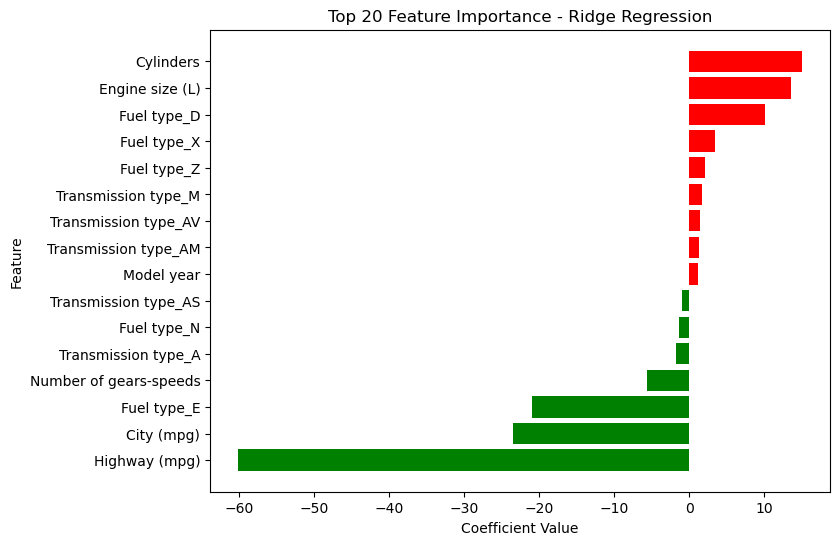

In [176]:
import matplotlib.pyplot as plt

# Extract coefficients for feature importance analysis
ridge_importance = pd.DataFrame({"Feature": X_train.columns, "Coefficient": best_ridge.coef_}).sort_values(by="Coefficient", ascending=False)

# Define colors: Red for positive, Green for negative coefficients
colors = ["red" if coef > 0 else "green" for coef in ridge_importance["Coefficient"].head(20)]

# Plot Ridge Regression Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(
    ridge_importance["Feature"].head(20), 
    ridge_importance["Coefficient"].head(20), 
    color=colors
)

plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importance - Ridge Regression")
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()

**Observations:**
- Fuel Economy (MPG) has the strongest negative effect, meaning efficiency is the biggest factor in lowering emissions.
- Engine size & cylinder count dominate the positive impact, confirming larger engines pollute more.
- Fuel type plays a notable role, with ethanol and natural gas reducing emissions while diesel and premium gasoline increase them.
- Transmission types have mixed effects, suggesting that efficiency gains depend on the specific drivetrain.
- Unexpectedly, `Model year` has a positive coefficient, meaning the trained model predicts a higher emission for newer cars when the rest are equal.

Let's check residuals now.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


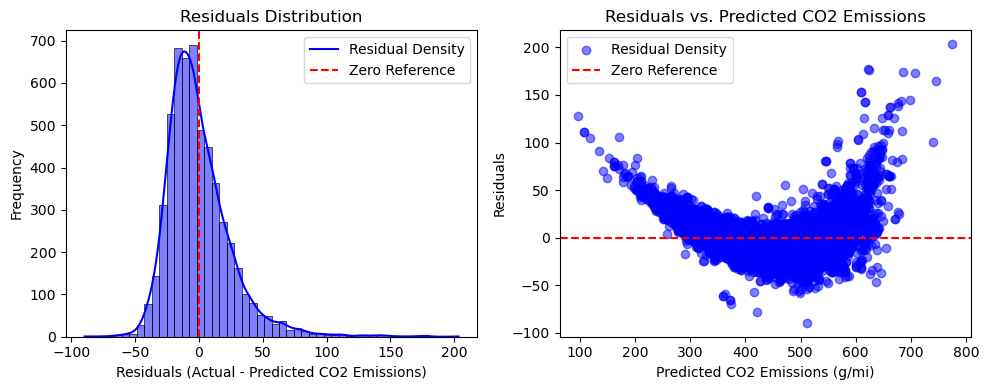

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
ridge_residuals = y_test - y_pred

# Create a side-by-side plot layout (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Adjust width for better spacing

# Plot 1: Residuals Distribution (Histogram)
sns.histplot(ridge_residuals, bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_xlabel("Residuals (Actual - Predicted CO2 Emissions)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Residuals Distribution")
axes[0].axvline(x=0, color='red', linestyle='dashed')
axes[0].legend(["Residual Density", "Zero Reference"])

# Plot 2: Residuals vs. Predicted Scatter Plot
axes[1].scatter(y_pred, ridge_residuals, alpha=0.5, color='blue')
axes[1].axhline(y=0, color='red', linestyle='dashed')
axes[1].set_xlabel("Predicted CO2 Emissions (g/mi)")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals vs. Predicted CO2 Emissions")
axes[1].legend(["Residual Density", "Zero Reference"])

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()

**Residual Analysis Results:**
- Residuals Distribution:
    - The residuals are approximately centered around zero, indicating a well-fitted model.
    - There are some extreme values, suggesting a few predictions have larger errors.
- Residuals vs. Predicted CO2 Emissions Scatter Plot:
    - Most residuals are randomly distributed around zero, which is a good sign.
    - A few high residuals suggest that some specific vehicle types or features on the extremes may not be well-captured by the linear model.

<h3>Model Evaluation</h3>

Here, I evaluate the model using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R^2).

In [183]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Create a DataFrame for clean table display
metrics_df = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-Squared (R²)"],
    "Value": [mae, mse, rmse, r2]
})
metrics_df

,Metric,Value
0,Mean Absolute Error (MAE),18.495017
1,Mean Squared Error (MSE),643.471775
2,Root Mean Squared Error (RMSE),25.366745
3,R-Squared (R²),0.939413


**Model Evaluation Results:**
- On average, predictions are off by about 18.49 g/mi of CO2 emissions.
- The model explains 92.89% of the variance in CO2 emissions.

<h3>Cross Validation</h3>

Now, let's see how the model perform in cross validation.

In [187]:
from sklearn.model_selection import cross_val_score

# Perform Cross-Validation on the best Ridge model
ridge_cv_scores = cross_val_score(best_ridge, X_train_scaled, y_train, scoring="r2", cv=5)

# Compute mean and standard deviation of cross-validation scores
ridge_cv_mean = ridge_cv_scores.mean()
ridge_cv_std = ridge_cv_scores.std()

# Evaluate on test set
ridge_test_r2 = best_ridge.score(X_test_scaled, y_test)

# Print results
print(f"Cross-Validation Mean R²: {ridge_cv_mean:.4f}")
print(f"Cross-Validation R² Std Dev: {ridge_cv_std:.4f}")
print(f"Test Set R²: {ridge_test_r2:.4f}")

Cross-Validation Mean R²: 0.9362
Cross-Validation R² Std Dev: 0.0013
Test Set R²: 0.9394


**Interpretation of Results**

The Ridge Regression model’s evaluation results indicate strong performance and good generalization:

- Cross-Validation Mean R²: 0.9362
    - This shows that, on average, the model explains 93.62% of the variance in the training data across cross-validation folds.
- Cross-Validation R² Standard Deviation: 0.0013
    - The low standard deviation indicates that the model performs consistently across different training-validation splits.
    - This means the model is stable and not overly sensitive to the choice of training data.
- Test Set R²: 0.9394
    - The test R² is very close to the cross-validation R² (0.9394 vs. 0.9362).
    - This means the model generalizes well to unseen data without significant overfitting.

The main insights:
- Model Generalization is Strong: No significant drop from cross-validation to test performance.
- Low Variance Across Cross-Validation Splits: The model is robust and consistent.
- No Overfitting: If the test R² had been much lower, it would indicate overfitting, but here it is well-aligned with cross-validation.

** Key Takeaways**
- **Strong Predictive Power:** The Ridge model accurately captures relationships between features and CO2 emissions.  
- **Good Generalization:** The small gap between cross-validation and test \( R^2 \) scores suggests the model is **not overfitting**.  
- **Regularization Helps:** Ridge regression successfully prevents excessive reliance on individual features by applying a small penalty on large coefficients.  

Overall, the Ridge model is performing well with a high R² and low variance, meaning it is a well-balanced, reliable model.

Nonetheless, let's explore if we could get even better performance using a polynomial method.

Before that, let's visualize how the model performs on the entire dataset.

In [190]:
# Standardize the entire features for prediction
X_scaled = scaler.transform(X)  

# Predict using the trained Ridge model
predicted_MRR = best_ridge.predict(X_scaled)

# Define actual values
actual = y

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


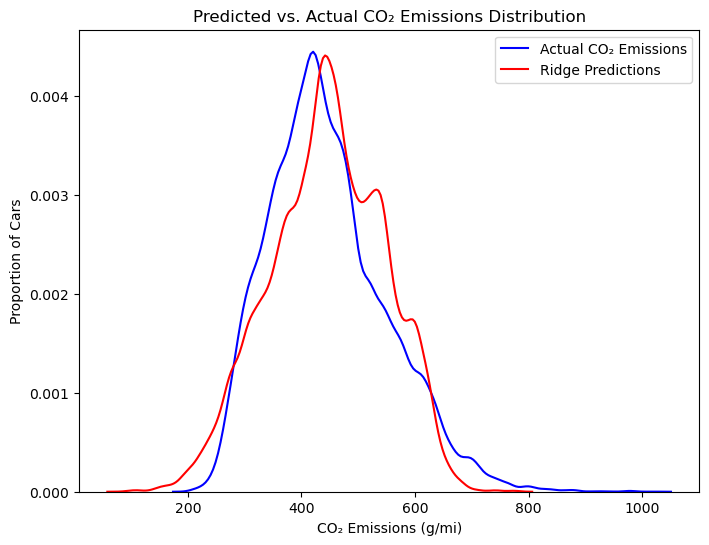

In [192]:
# Define plot size
plt.figure(figsize=(8, 6))

# KDE plots for two distributions
ax = sns.kdeplot(actual, color="b", label="Actual CO₂ Emissions", bw_adjust=0.8)   # Blue Line - Actual Values
sns.kdeplot(predicted_MRR, color="r", label="Ridge Predictions", ax=ax, bw_adjust=0.8)  # Red Line - Ridge Regression Predictions

# Add title and labels
plt.title("Predicted vs. Actual CO₂ Emissions Distribution")
plt.xlabel("CO₂ Emissions (g/mi)")
plt.ylabel("Proportion of Cars")

# Add legend
plt.legend()

# Show plot
plt.show()

**Observations:**
- The two curves are very close, indicating strong model performance.
- Deviations at the tail ends:
    - Overestimation of low emissions (left tail): The model predicts slightly higher emissions for very efficient vehicles.
    - Underestimation of high emissions (right tail): The model struggles to predict extreme high-emission cases, suggesting possible bias in high-performance vehicles.

The Ridge model performs well overall, capturing most of the variance in CO₂ emissions. The slight overestimation of low-emission vehicles and underestimation of high-emission vehicles suggest potential room for improvement. Nonlinear effects might be better captured with Polynomial Ridge or another technique (e.g., ensemble methods). Let's now turn into Polynomial modeling.

<h3>Polynomial Model</h3>

Here, I will focus on developing a second-degree polynomial ridge with hyperparameter optimization. I checked several other models, including 3rd-degree polynomial ridge, Random Forest, and SVR. The 3rd-degree polynomials Ridge performs slightly better (+00.3% R^2) than 2nd-degree and the rest perform equal or worse. Nonetheless, I decided to select 2nd-degree polynomials to balance complexity and risking overfitting.


In [196]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Polynomial feature transformation (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Hyperparameter tuning for Ridge Regression
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Regularization strength
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring="r2")
ridge_cv.fit(X_train_poly, y_train)

# Get the best alpha
best_alpha_poly = ridge_cv.best_params_['alpha']
print(f"Best Alpha for Polynomial Ridge: {best_alpha_poly}")

Best Alpha for Polynomial Ridge: 1


Now that the best parameter is determined, I train the model using the `make_pipeline()` function that simplifies the process. Since I observed collinearity, I first apply polynomial transformation and then scale the data.

In [199]:
# Define Pipeline (Correct Order: Polynomial → Scaling → Ridge)
ridge_poly = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), StandardScaler(), Ridge(alpha=best_alpha_poly))

# Train the model
ridge_poly.fit(X_train, y_train)

# Evaluate model performance
ridge_poly_r2_train = ridge_poly.score(X_train, y_train)
ridge_poly_r2_test = ridge_poly.score(X_test, y_test)

# Print results
print(f"R² on Training Set: {ridge_poly_r2_train:.4f}")
print(f"R² on Test Set: {ridge_poly_r2_test:.4f}")

R² on Training Set: 0.9948
R² on Test Set: 0.9948


<h3>Model Evaluation</h3> 

In [202]:
# Generate predictions on the test set using Polynomial Ridge Regression
y_pred_poly = ridge_poly.predict(X_test)

# Compute evaluation metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Create a DataFrame for clean table display
metrics_poly_df = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-Squared (R²)"],
    "Value": [mae_poly, mse_poly, rmse_poly, r2_poly]
})

# Merge both DataFrames on the "Metric" column
comparison_df = metrics_df.merge(metrics_poly_df, on="Metric")
# ✅ Rename the columns after merging
comparison_df.rename(columns={"Value_x": "Ridge Regression", 
                              "Value_y": "Polynomial Ridge Regression"}, inplace=True)
# Display the table
comparison_df

,Metric,Ridge Regression,Polynomial Ridge Regression
0,Mean Absolute Error (MAE),18.495017,4.896999
1,Mean Squared Error (MSE),643.471775,54.944381
2,Root Mean Squared Error (RMSE),25.366745,7.412448
3,R-Squared (R²),0.939413,0.994827


**Observations:**
- MAE: The polynomial model has significantly lower average absolute error, meaning its predictions are much closer to actual values.
- MSE: The squared error is drastically lower in the polynomial model, indicating much less variance in prediction errors. The large drop in MSE shows how the first struggled with nonlinear effects, while polynomials handle them well.
- RMSE: The polynomial model reduces large errors significantly, showing better accuracy in capturing real CO₂ emissions.
- R-Squared (R²): The polynomial model explains 99.48% of the variance, which is extremely high, suggesting a near-perfect fit.

Overall, the Polynomial Ridge Regression model performs exceptionally well. It exhibits massively improved accuracy: Lower MAE, MSE, and RMSE show that the model generalizes much better. The near-perfect R² score (0.9948) Suggests high predictive power, but could also indicate overfitting to training data. The RMSE reduction is almost 3.5x smaller than in Ridge Regression, meaning errors are minimized significantly.

So far, the polynomial Ridge Regression (Degree 2) is clearly superior to the previous model in all aspects! Let's check cross validation results.

<h3>Cross Validation</h3>

In [206]:
# Perform Cross-Validation on the Polynomial Ridge model
ridge_poly_cv_scores = cross_val_score(ridge_poly, X_train, y_train, scoring="r2", cv=5)

# Compute mean and standard deviation of cross-validation scores
ridge_poly_cv_mean = ridge_poly_cv_scores.mean()
ridge_poly_cv_std = ridge_poly_cv_scores.std()

# Evaluate on test set
ridge_poly_test_r2 = ridge_poly.score(X_test, y_test)

# Create DataFrame for cross-validation results comparison
cv_comparison_df = pd.DataFrame({
    "Metric": ["Cross-Validation Mean R²", "Cross-Validation R² Std Dev", "Test Set R²"],
    "Ridge Regression": [ridge_cv_mean, ridge_cv_std, ridge_test_r2],
    "Polynomial Ridge Regression": [ridge_poly_cv_mean, ridge_poly_cv_std, ridge_poly_test_r2]
})

# Show results
cv_comparison_df

,Metric,Ridge Regression,Polynomial Ridge Regression
0,Cross-Validation Mean R²,0.936176,0.994598
1,Cross-Validation R² Std Dev,0.001254,0.000287
2,Test Set R²,0.939413,0.994827


**Interpretation:**
- Cross-Validation Mean R²: The polynomial ridge model explains a significantly higher proportion of variance in the data, meaning it captures more complex relationships compared to standard ridge regression.
- Cross-Validation R² Std Dev: The polynomial model is more stable, with much lower variation across different validation folds. This suggests it generalizes well during cross-validation.
- Test Set R²: The polynomial ridge model generalizes better to unseen test data, reinforcing its effectiveness.

Overall, the Polynomial Ridge outperforms standard Ridge Regression in both cross-validation and test set performance. The lower R² standard deviation suggests the polynomial model is more stable across different training sets.

The question now is whether there is any risk of overfitting. No overfitting was detected as training, cross-validation, and test scores are all very close.The polynomial model performs exceptionally well, but we should check residuals.
Fist, let's look at feature importance.

<h3>Feature Importance</h3> 

Let's visualize the 10 most important polynomial features.

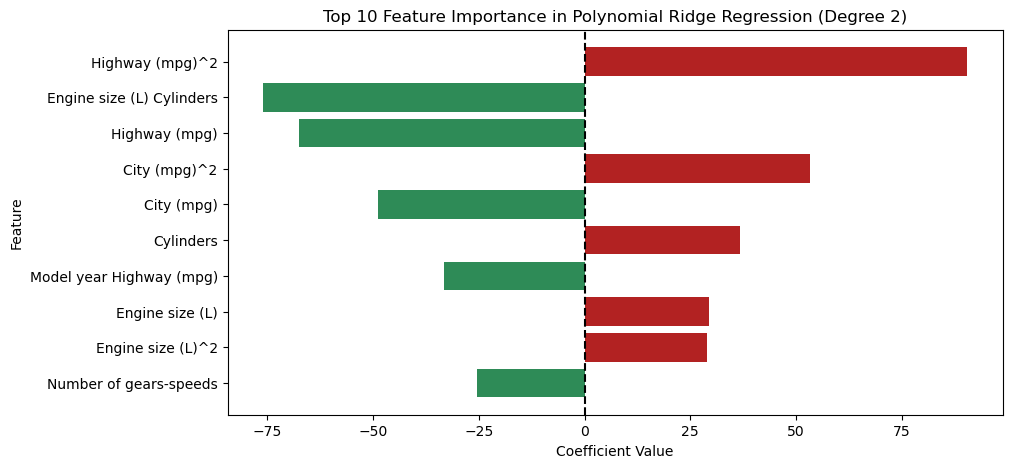

In [210]:
# Extract polynomial feature names
poly_features = ridge_poly.named_steps["polynomialfeatures"]
feature_names = poly_features.get_feature_names_out(X_train.columns)

# Extract Ridge regression coefficients
ridge_poly_coefficients = ridge_poly.named_steps["ridge"].coef_

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": ridge_poly_coefficients
})

# Select the top 10 features (sorted by absolute importance)
top_10_features = feature_importance_df.reindex(feature_importance_df["Coefficient"].abs().nlargest(10).index)

# Define colors: Red for positive, Green for negative coefficients
colors = ["#B22222" if coef > 0 else "#2E8B57" for coef in top_10_features["Coefficient"]]

# Plot Top 10 Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(top_10_features["Feature"], top_10_features["Coefficient"], color=colors)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance in Polynomial Ridge Regression (Degree 2)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.axvline(x=0, color="black", linestyle="dashed")  # Vertical line at 0 for reference

plt.show()

The above plot visualizes the top 10 most influential features in your Polynomial Ridge Regression model (Degree 2). The horizontal bars represent the coefficient values, indicating how much each feature contributes to predicting CO₂ emissions (g/mi).

**Key Observations:**
- Quadratic Terms Have Strong Influence:
    - Highway (mpg)² has the strongest positive coefficient, meaning higher highway fuel efficiency has a diminishing effect on reducing CO₂ emissions. While improving fuel economy still reduces emissions, this suggests the impact flattens at higher MPG values.
    - City (mpg)² has the second strongest positive coefficient, with a similar meaning. At lower `City (mpg)` values, CO2 emissions decrease as fuel efficiency improves. As vehicles become more efficient, the marginal benefit of each additional mpg decreases.
    - Engine Size (L)² is positively correlated, reinforcing that larger engines contribute to higher emissions.
- Interaction Effects are Important:
    - Engine Size (L) × Cylinders has a negative coefficient, which suggests that for a given engine size, adding more cylinders slightly counterbalances the emissions increase (perhaps due to improved efficiency at specific loads).
    - Model Year × Highway (mpg) also has a negative coefficient, likely indicating that newer models benefit from better highway efficiency, reducing emissions over time.
- Linear Terms Still Matter:
    - Highway (mpg) & City (mpg) remain significant negative coefficient, confirming that fuel-efficient vehicles have lower emissions.
    - Engine Size (L) & Cylinders continue to positively influence emissions, meaning larger and more powerful engines produce more CO₂.
    - Number of gears-speeds has a negative coefficient, suggesting that vehicles with more gears tend to have better fuel efficiency, reducing emissions.

This feature importance analysis provides critical insights into how vehicle attributes affect CO₂ emissions. Polynomial terms reveal diminishing returns on fuel efficiency improvements, especially for highway MPG. Feature interactions capture non-linear dependencies, such as how cylinder count affects emissions differently based on engine size. The graph also shows how ridge regularization keeps coefficients balanced, ensuring that extreme values don’t dominate the model.

<h3>Residual Analysis</h3> 

Now, let's check the polynomial model's residuals and compare it with the first model.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


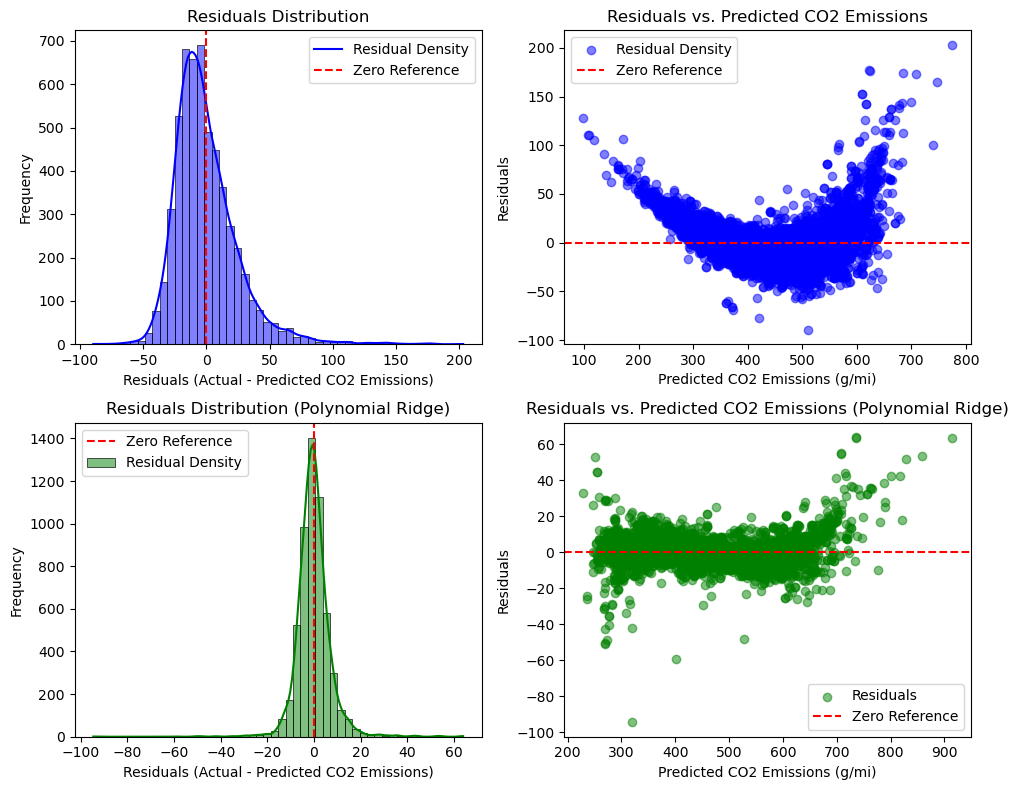

In [214]:
# Generate predictions
y_pred_poly = ridge_poly.predict(X_test)

# Calculate residuals
ridge_poly_residuals = y_test - y_pred_poly

# Create a side-by-side plot layout (1 row, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Adjust width for better spacing

# Plot 1: Residuals Distribution (Histogram)
sns.histplot(ridge_residuals, bins=50, kde=True, color='blue', ax=axes[0, 0])
axes[0 , 0].set_xlabel("Residuals (Actual - Predicted CO2 Emissions)")
axes[0 , 0].set_ylabel("Frequency")
axes[0 , 0].set_title("Residuals Distribution")
axes[0 , 0].axvline(x=0, color='red', linestyle='dashed')
axes[0 , 0].legend(["Residual Density", "Zero Reference"])

# Plot 2: Residuals vs. Predicted Scatter Plot
axes[0, 1].scatter(y_pred, ridge_residuals, alpha=0.5, color='blue')
axes[0, 1].axhline(y=0, color='red', linestyle='dashed')
axes[0, 1].set_xlabel("Predicted CO2 Emissions (g/mi)")
axes[0, 1].set_ylabel("Residuals")
axes[0, 1].set_title("Residuals vs. Predicted CO2 Emissions")
axes[0, 1].legend(["Residual Density", "Zero Reference"])

# Plot 3: Residuals Distribution (Histogram)
sns.histplot(ridge_poly_residuals, bins=50, kde=True, color='green', ax=axes[1, 0], label="Residual Density")
axes[1, 0].set_xlabel("Residuals (Actual - Predicted CO2 Emissions)")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("Residuals Distribution (Polynomial Ridge)")
axes[1, 0].axvline(x=0, color='red', linestyle='dashed', label="Zero Reference")
axes[1, 0].legend()

# Plot 4: Residuals vs. Predicted Scatter Plot
axes[1, 1].scatter(y_pred_poly, ridge_poly_residuals, alpha=0.5, color='green', label="Residuals")
axes[1, 1].axhline(y=0, color='red', linestyle='dashed', label="Zero Reference")
axes[1, 1].set_xlabel("Predicted CO2 Emissions (g/mi)")
axes[1, 1].set_ylabel("Residuals")
axes[1, 1].set_title("Residuals vs. Predicted CO2 Emissions (Polynomial Ridge)")
axes[1, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()

**Observations:**
- Residuals Distribution (Bottom Left Plot)
    - Near-normal distribution: The histogram of residuals is centered around zero, indicating that the model is unbiased in its predictions.
    - Small spread: Most residuals fall between -20 and 20 g/mi, showing that the model has low error variance.
    - Few extreme residuals: There are some larger residuals (beyond ±60 g/mi), but their frequency is low, suggesting a few outliers or harder-to-predict cases.
- Residuals vs. Predicted CO₂ Emissions (Bottom Right Plot)
    - Mostly homoscedastic (constant variance): The residuals are evenly spread around zero across predicted values, meaning no strong heteroscedasticity (variance is fairly constant).
    - Some pattern at high emissions: At predicted CO₂ emissions above ~700 g/mi, residuals tend to increase, suggesting that the model slightly underestimates emissions for high-emission vehicles.
    - No major systematic bias: The horizontal spread suggests no major missing patterns, meaning the model is making good generalized predictions.
    

When it comes to comparing with the first model, we observe:
- Residuals Distribution (Top Left vs. Bottom Left)
    - Linear Ridge (Top Left):
        - The residuals are approximately centered around zero, but they show a wider spread.
        - There is a noticeable right tail, suggesting the model struggles with higher CO₂ emissions.
        - The distribution is skewed, indicating some systematic prediction errors.
    - Polynomial Ridge (Bottom Left):
        - The residuals are much more tightly clustered around zero.
        - The spread is significantly reduced, indicating lower variance.
        - The distribution appears more symmetric, suggesting better error distribution.
    - Winner: Polynomial Ridge Regression since the tighter spread and symmetry suggest lower prediction errors.

- Residuals vs. Predicted CO₂ Emissions (Top Right vs. Bottom Right)
    - Linear Ridge (Top Right):
        - Clear curvature in residuals, indicating the model is missing non-linear relationships.
        - Residuals become larger as CO₂ emissions increase.
        - The “U-shaped” pattern suggests that linear assumptions are not fully capturing the data trends, leading to systematic over/under-predictions.
    - Polynomial Ridge (Bottom Right):
        - Residuals are much more evenly scattered around zero.
        - No apparent curvature, meaning the polynomial model has successfully captured the non-linearity.
        - Outliers still exist but are far fewer than in the linear model.
    - Winner: Polynomial Ridge Regression. The residuals are more random, meaning the model captures the underlying data patterns better.

**Final Verdict:**
- The polynomial ridge regression model clearly outperforms the linear ridge regression in both error distribution and residual scatter.
- It effectively reduces systematic bias and captures non-linearity in CO₂ emissions predictions.
- The only downside may be overfitting risk, but based on the cross-validation scores, this doesn’t seem to be a significant issue.
As such, I conclude the Polynomial Ridge Regression is the superior model.

<h3>Overall Performance</h3>

Now let's see how each model does with respect to the entire dataset.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


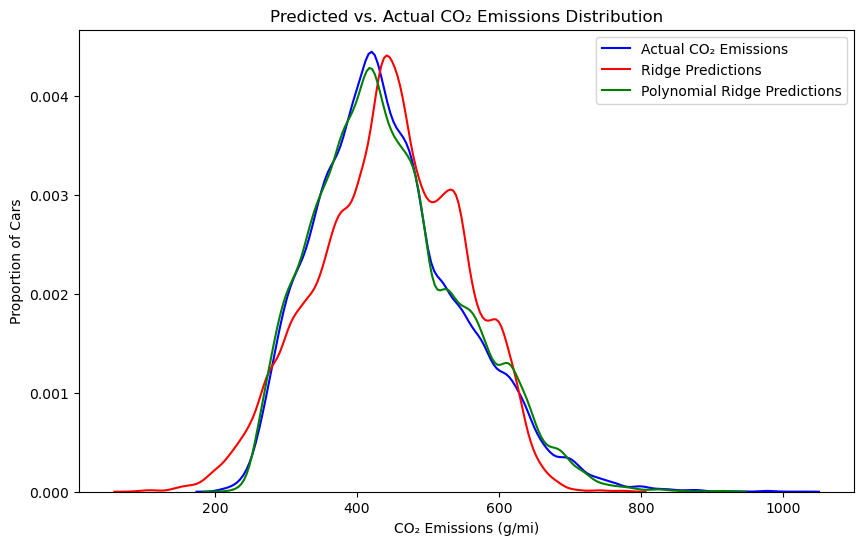

In [218]:
# Predict emissions for the entire dataset
predicted_poly = ridge_poly.predict(X)

# Define plot size
plt.figure(figsize=(10, 6))

# KDE plots for three distributions
ax = sns.kdeplot(actual, color="b", label="Actual CO₂ Emissions", bw_adjust=0.8)   # Blue Line - Actual Values
sns.kdeplot(predicted_MRR, color="r", label="Ridge Predictions", ax=ax, bw_adjust=0.8)  # Red Line - Ridge Regression Predictions
sns.kdeplot(predicted_poly, color="g", label="Polynomial Ridge Predictions", ax=ax, bw_adjust=0.8)  # Green Line - Polynomial Ridge Predictions

# Add title and labels
plt.title("Predicted vs. Actual CO₂ Emissions Distribution")
plt.xlabel("CO₂ Emissions (g/mi)")
plt.ylabel("Proportion of Cars")

# Add legend
plt.legend()

# Show plot
plt.show()

**Interpretation:**
- Ridge Regression (Red Line)
    - The ridge model captures the overall trend but deviates at certain points.
    - It slightly underestimates lower CO₂ emissions (left side) and overestimates emissions around the peak.
    - There is a noticeable offset from the actual distribution, indicating bias in predictions.
    - The second peak (around 500-600 g/mi) is exaggerated, which suggests that the model struggles with some vehicle types.
- Polynomial Ridge Regression (Green Line)
    - The polynomial ridge model closely follows the actual distribution (blue line).
    - The peak is aligned well with actual emissions, indicating better accuracy.
    - The polynomial model smoothly follows the distribution in both high and low emission ranges, reducing systematic bias.
    - The tail-end predictions (higher emissions) are less exaggerated compared to ridge regression, indicating better generalization.

**Final Verdict:**
The polynomial ridge model significantly outperforms the standard ridge model in terms of capturing the actual distribution of CO₂ emissions. It shows better alignment with actual values, reducing bias. It also exhibits less deviation at extreme values, suggesting improved generalization. The first model struggles to fully capture non-linearity, making polynomial regression the better choice.

Based on these observations and interpretations, I conclude the Polynomial Ridge Regression is the superior model for this dataset.

<h3>Polynomial Model's Mathematical Expression</h3>

What is the mathetical equation representing the polynomial ridge model? A **second-order polynomial regression** has the following general formula, capturing **linear, quadradic, and interaction effects** between variables.:

The bellow formula represents the general form of a **second-degree polynomial regression model**, capturing **linear, quadradic, and interaction effects** between variables.

$$
\text{y} = \beta_0 + \sum_{i=1}^{n} \beta_i x_i + \sum_{i=1}^{n} \sum_{j=i}^{n} \beta_{ij} x_i x_j + \dots
$$

where:  
- $y_i$ represents dependent variabl (e.g., `CO2 emissions (g/mi)`),
- $x_i$ represents input features (e.g., `Model year`, `Highway (mpg)`, `Fuel type_Z`),
- $\beta_0$ is the intercept (bias),
- $\beta_i$ are linear coefficients,
- $\beta_{ij}$ are interaction coefficients for polynomial terms.

Let's extract the model's coefficients to partially construct its mathematical equation.

In [226]:
# Extract polynomial feature names from trained model
poly_features = ridge_poly.named_steps["polynomialfeatures"]
feature_names = poly_features.get_feature_names_out(X_train.columns)

# Extract corresponding coefficients from trained Ridge model
ridge_coefficients = ridge_poly.named_steps["ridge"].coef_

# Store as dictionary
model_coefficients = dict(zip(feature_names, ridge_coefficients))

# Print number of coefficient
print(f"Number of coeffients:", ridge_coefficients.size)

Number of coeffients: 152


There are 152 coefficients in the prediction equation. Let's check the first 10.

In [229]:
# Print first 10 coefficients
print("Polynomial Ridge Model Coefficients:")
for feature, coef in list(model_coefficients.items())[:10]:  # Show only first 10
    print(f"{feature}: {coef:.4f}")

Polynomial Ridge Model Coefficients:
Model year: -20.5760
Engine size (L): 29.3995
Cylinders: 36.7315
Number of gears-speeds: -25.4987
City (mpg): -48.8734
Highway (mpg): -67.6013
Transmission type_A: 5.9841
Transmission type_AM: -4.2529
Transmission type_AS: -3.2592
Transmission type_AV: -6.4071


The second-degree polynomial model that was trained above starts with the following five clauses:

\begin{aligned}
CO_2 \text{ Emissions} &= 
(-20.5760 \times \text{Model Year}) + 
(29.3995 \times \text{Engine Size (L)}) + 
(36.7315 \times \text{Cylinders}) \\
&\quad - (25.4987 \times \text{Number of Gears-Speeds}) - 
(48.8734 \times \text{City (mpg)}) - 
(67.6013 \times \text{Highway (mpg)}) + \dots
\end{aligned}

After using this formula to predict a series of hypothetical cars, I found out while the model performs well on the training and testing data, it struggles with predicting extreme auto specifications and performs poorly. These cases were within the boundaries of the features' record. Nonetheless, the model fails to on both tails. So, I decided to look into other ML models that:
- handle skewed data with in presence of multicollinearity.
- deals better with combination of numerical and categorical features.

<h3>Random Forest Model</h3>

Upon exploring several options, including Neural Network, Gradient Boosting, SVR, I found Random Forest providing a balanced model for the objective of this project.
The Random Forest method does not require feature scaling and I the common parameters (n_estimators=200, max_depth=20) worked well. I did hyperparameter optimization too, but but decided not to include it here for the results were already good and the accuracy of the results were impacted by my device processing power.

In [235]:
# ------------------- Train Random Forest Model -------------------

# Define Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set using Random Forest
y_pred_rf = rf_model.predict(X_test)

print("✅ Training Done!")

✅ Training Done!


In [237]:
# ------------------- Evaluate Random Forest Model -------------------

# Calculate Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print Evaluation Results
print(f"Random Forest Model R²: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")

Random Forest Model R²: 0.9992
MAE: 0.87, RMSE: 2.99


In [239]:
# Cross-validation for better validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring="r2")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R²: {cv_scores.mean():.4f}")

Cross-Validation R² Scores: [0.99051938 0.99905551 0.99916153 0.99409904 0.99535384]
Mean R²: 0.9956


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


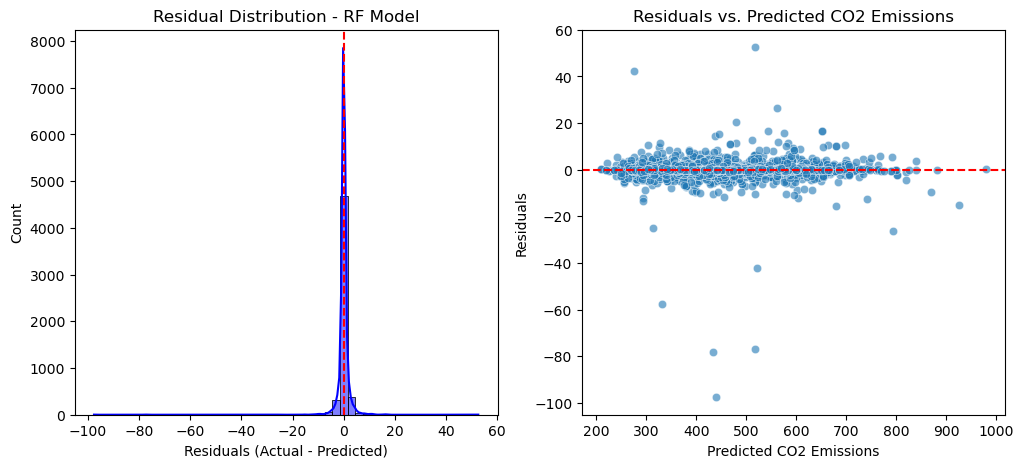

In [241]:
# ------------------- Residual Analysis -------------------

residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(12, 5))

# Residual Distribution
plt.subplot(1, 2, 1)
sns.histplot(residuals_rf, bins=50, kde=True, color="blue")
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution - RF Model")

# Residuals vs. Predicted
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CO2 Emissions")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted CO2 Emissions")

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


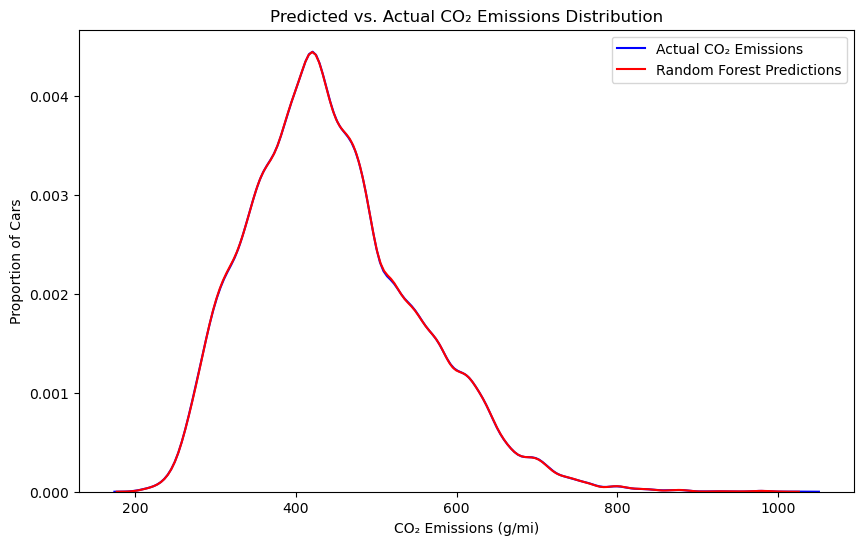

In [243]:
# Predict emissions for the entire dataset
predicted_rf = rf_model.predict(X)

# Define plot size
plt.figure(figsize=(10, 6))

# KDE plots for three distributions
ax = sns.kdeplot(actual, color="b", label="Actual CO₂ Emissions", bw_adjust=0.8)   # Blue Line - Actual Values
sns.kdeplot(predicted_rf, color="r", label="Random Forest Predictions", ax=ax, bw_adjust=0.8)  # Green Line - Random Forest Predictions

# Add title and labels
plt.title("Predicted vs. Actual CO₂ Emissions Distribution")
plt.xlabel("CO₂ Emissions (g/mi)")
plt.ylabel("Proportion of Cars")

# Add legend
plt.legend()

# Show plot
plt.show()

                   Feature  Importance
4               City (mpg)    0.891949
12             Fuel type_E    0.051039
5            Highway (mpg)    0.049513
11             Fuel type_D    0.004390
0               Model year    0.000976
13             Fuel type_N    0.000957
1          Engine size (L)    0.000876
3   Number of gears-speeds    0.000107
14             Fuel type_X    0.000052
2                Cylinders    0.000044


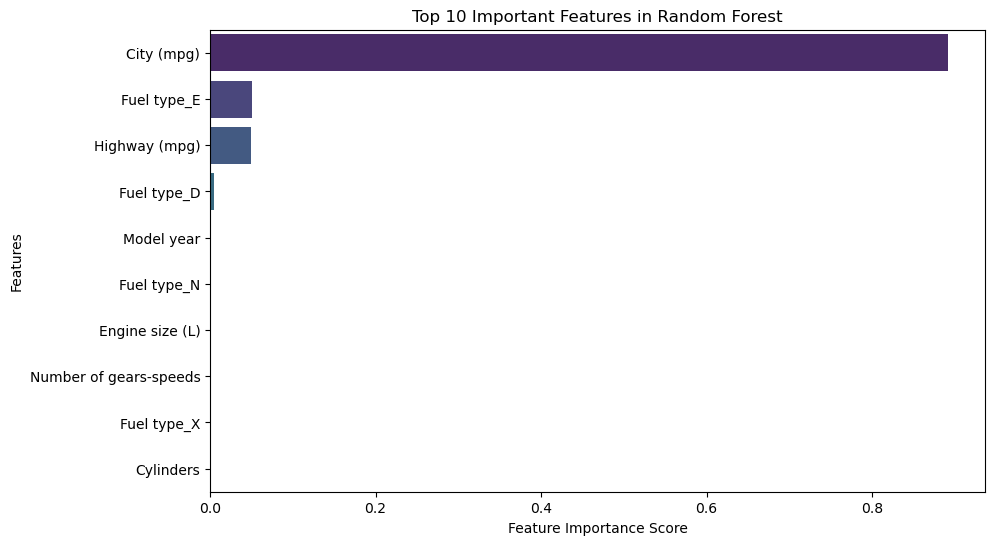

In [245]:
# Feature importance analysis
importances = rf_model.feature_importances_
feature_names = X.columns

# Convert to DataFrame for visualization
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display top 10 features
print(feature_importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df[:10], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Random Forest")
plt.show()

Overall, the random forest model outperformed the previous two models.

<h3>Prediction Example</h3>

Let's say an auto company announced they will release two new cars in 2026 with the following features:
- `Model year` = (2026, 2026)
- `Engine size (L)` = (2, 2.5)
- `Cylinders` = (4, 4)
- `Transmission type` = ("M", "AV")
- `Number of gears-speeds` = (6, 8)
- `Fuel type` = ("Z", "Z")
- `City (mpg)` = (22, 25.5)
- `Highway (mpg)` = (32, 34)

The two cars differ in their `Engine size`, `Transmission type`, `Number of gears-speeds`, and fuel consumptions (MPGs). I'm interested to buy the one with the smaller use-phase CO2 emissions. 
I know that smaller engines and cars with more gears/speed generally tend to emit less, and manual transmission is correlated with higher emissions. Similarly, I know higher MPGs are associated with lower emissions.
However, I don't have a good sense about these new cars and how the differing variables interact with each other. The trained model enables me to get an estimate with a high level of confidence.

I need to take the following steps to prepare the data for the model and get a prediction:

In [254]:
from scipy.stats import norm

# Step 1: Define multiple hypothetical vehicles
hypothetical_vehicles = pd.DataFrame([
    {"Model year": 2026, "Engine size (L)": 2, "Cylinders": 4, "Transmission type": "M", 
     "Number of gears-speeds": 6, "Fuel type": "Z", "City (mpg)": 22, "Highway (mpg)": 32},
    
    {"Model year": 2026, "Engine size (L)": 2.5, "Cylinders": 4, "Transmission type": "AV", 
     "Number of gears-speeds": 8, "Fuel type": "Z", "City (mpg)": 25.5, "Highway (mpg)": 34}
])

# Step 2: One-Hot Encode Categorical Features
hypothetical_encoded = pd.get_dummies(hypothetical_vehicles, columns=["Transmission type", "Fuel type"])

# Step 3: Ensure feature alignment with training data (Add missing columns)
missing_cols = set(X_train.columns) - set(hypothetical_encoded.columns)
for col in missing_cols:
    hypothetical_encoded[col] = 0  # Add missing categorical variables with 0

# Step 4: Reorder columns to match training set
hypothetical_encoded = hypothetical_encoded[X_train.columns]


# Step 5: Compute standard deviation from residuals
sigma = np.std(residuals_rf)  # Standard deviation of residuals

# Step 6: Compute emissions & 95% confidence intervals (assuming normal distribution of residuals- practically but not exactly)
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # 1.96 for 95% confidence

# Predict emissions for hypothetical vehicles
hypothetical_predictions = rf_model.predict(hypothetical_encoded)

# Compute confidence intervals
lower_bounds = hypothetical_predictions - z_score * sigma
upper_bounds = hypothetical_predictions + z_score * sigma

# Step 7: Display Results with Confidence Intervals
for i, (pred, lower, upper) in enumerate(zip(hypothetical_predictions, lower_bounds, upper_bounds), 1):
    print(f"Hypothetical Vehicle {i} - Predicted CO₂ Emissions: {pred:.2f} g/mi")
    print(f"   95% Confidence Interval: ({lower:.2f}, {upper:.2f}) g/mi")

Hypothetical Vehicle 1 - Predicted CO₂ Emissions: 347.73 g/mi
   95% Confidence Interval: (341.86, 353.60) g/mi
Hypothetical Vehicle 2 - Predicted CO₂ Emissions: 308.03 g/mi
   95% Confidence Interval: (302.16, 313.90) g/mi


The second vehicle has slightly lower emissions despite having a larger engine (2.5L vs. 2.0L), likely due to differences in transmission type and fuel efficiency (MPGs).
Since the predicted values are outside 95% confidence interval of each other, I feel comfortable to take the second car as the one with lower emissions.

<h3>CO2 Prediction App</h3>

For the final step of this project, I will extract the model and a few file to use in an interactive Streamlit app that utilize this model to predict CO2 emissions. The aim is to develop a light app that operate independently and minimize processing data.

In [258]:
import joblib    
# ------------------- Save Model for Future Use -------------------

joblib.dump(rf_model, "CO2/app/random_forest.pkl")
joblib.dump(rf_model, "CO2/app/random_forest_compressed.pkl", compress=3)
joblib.dump(list(X.columns), "CO2/app/feature_columns.pkl")  # Save column order for later predictions

print("✅ Model and Feature Columns Saved!")

✅ Model and Feature Columns Saved!


In [260]:
# ------------------- Save Models residuals-------------------
residuals_rf.to_csv("CO2/app/residuals_rf.csv", index=False)
pd.Series(actual).to_csv("CO2/app/actual_rf.csv", index=False)
pd.Series(predicted_rf).to_csv("CO2/app/predicted_rf.csv", index=False)
print("files saved successfully!")

files saved successfully!


<div style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 15px; 
    border-radius: 5px; 
    font-size: 24px;
    font-weight: bold;
    margin-top: 20px;">
    <h2 id="conclusions" style="margin: 0; padding: 5px 10px;">6. Conclusion</h2>
</div>

This project aimed to develop a predictive model for use-phase CO₂ emissions of interla combustion engine vehicles based on 12 datasets available from the Government of Canada covering record in North America from 1995 to 2025. I began by importing and cleaning the datasets, ensuring data consistency by handling missing values, removing outliers, and filtering hybrid vehicles that could distort emission trends. Exploratory Data Analysis (EDA) provided insights into key relationships, such as engine size, fuel type, and MPG ratings, confirming expected trends like the negative correlation between fuel efficiency and emissions. I also detected multicollinearity among variables such as cylinders, engine size, and fuel consumption metrics, influencing our feature selection approach and ML methods.

Following EDA, I implemented Ridge Regression, Polynomial Ridge Regression (degree 2), and random forest methods to train and compare models. Cross-validation examined the models’ generalizability, and performance metrics (R², RMSE, MAE) demonstrated that the random forest model significantly outperformed the rest in accuracy while maintaining stable residuals. The residual analysis confirmed that the last model reduced systematic bias and better captured nonlinearities and extreme cases in the dataset. Furthermore, confidence intervals were calculated to assess uncertainty in predictions, reinforcing the model’s reliability.

In conclusion, this study successfully built a robust CO₂ emissions prediction framework, demonstrating ML modeling capabilities. While the random forest model provides high accuracy, further improvements could include incorporating additional real-world factors like vehicle weight and fine-tuning the model. Future work may also explore deep learning approaches for even greater predictive power.

<div style="
    background-color: #f5f5f5; 
    padding: 15px; 
    border-radius: 8px; 
    border-left: 5px solid #4A90E2;
    font-family: Arial, sans-serif;
">

✍️ **Author:**  
**Hasan Roshan** – Sustainability Analyst, Ph.D. in Environmental & Natural Resource Sciences  

🔗 **LinkedIn:**  [/hasanroshan](https://linkedin.com/in/hasanroshan)  

🎓 **Acknowledgments:**  
- This project was inspired by an **IBM Data Science Professional Certificate exercise**, where a small subset of the 1995-2004 dataset (~1,000 records) was used to build a multiple linear regression model based on selected numerical variables. This work significantly expanded the dataset, included categorical variables, and refined the model and explored new methods for improved predictive accuracy. 
- Throughout this project, **prompt engineering** with **ChatGPT** was utilized for code development, optimization, image generation, and content structuring.

⚠️ **Disclaimer:**  Predictions may have slight variances based on real-world conditions. This app is intended for **educational and analytical purposes**.

📅 **Last Updated:** February 1, 2025  

</div>